<a href="https://colab.research.google.com/github/LaboraDev/hackathon_one_flightOnTime/blob/main/notebook_completo_s01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semana 01 - Equipe DS**

## **Extração e Carregamento dos Dados**

O objetivo principal deste notebook é fornecer ao time uma base padronizada e validada, pronta para uso nas tarefas da Semana 01:

- DS1 - Qualidade e Estrutura dos Dados   
- DS2 - Distribuições e Comportamento das Variáveis  
- DS3 - Correlações e Relações Entre Variáveis  
- DS4 - Sazonalidade (Tempo: Mês, Dia, Horário)  
- DS5 - Segmentação (Companhias & Aeroportos)

## Configuração do Ambiente e Bibliotecas  

In [22]:
# Instalar gdown (baixa arquivos do Google Drive por ID)
!pip install -q gdown
!pip install -q unidecode

# Import de bibliotecas essenciais
import gdown
import os
import zipfile
import pandas as pd
import numpy as np
import glob
import unidecode
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Carregamento dos dados

In [23]:
# ID do Dataset
#https://drive.google.com/file/d/1207psedBKvnS0pJkDITroSzPiWrcz0ag/view?usp=sharing
file_id = "1207psedBKvnS0pJkDITroSzPiWrcz0ag"

# Nome do arquivo que será baixado no Colab
zip_path = "dados_vra.zip"

# Se ainda não existir o zip, baixa do Drive
if not os.path.exists(zip_path):
    url = f"https://drive.google.com/uc?id={file_id}"
    print("Baixando arquivo do Drive...")
    gdown.download(url, zip_path, quiet=False)
else:
    print("Arquivo ZIP já existe, download interrompido.")

# Extrair o conteúdo do zip
extract_folder = "dados_vra"

if not os.path.exists(extract_folder):
    print("Extraindo arquivos do ZIP...")
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall(extract_folder)
else:
    print("Pasta de dados já existe.")

Arquivo ZIP já existe, download interrompido.
Pasta de dados já existe.


In [24]:
def carregar_vra(
    pasta="/content/dados_vra/dados_vra",
    padrao="VRA_*.csv",
    sep=";",
    encoding="latin-1",
    skiprows=1
):
    # Encontrar arquivos
    caminho_busca = os.path.join(pasta, padrao)
    arquivos = sorted(glob.glob(caminho_busca))

    if not arquivos:
        raise FileNotFoundError(f"Nenhum arquivo encontrado com o padrão: {caminho_busca}")

    print(f"{len(arquivos)} arquivos encontrados:")

    dfs = []
    colunas_referencia = None

    # Ler e validar estrutura
    for arquivo in arquivos:
        df_temp = pd.read_csv(
            arquivo,
            sep=sep,
            encoding=encoding,
            skiprows=skiprows
        )

        # Define colunas de referência com o primeiro arquivo
        if colunas_referencia is None:
            colunas_referencia = list(df_temp.columns)
            print("Colunas de referência definidas.")
        else:
            # Compara colunas dos demais arquivos
            colunas_atual = list(df_temp.columns)
            if colunas_atual != colunas_referencia:
                print("Estrutura diferente!")
                print("Colunas esperadas: ", colunas_referencia)
                print("Colunas encontradas: ", colunas_atual)
                raise ValueError(f"Estrutura de colunas diferente no arquivo: {arquivo}")

        dfs.append(df_temp)

    # Concatenar tudo
    df_final = pd.concat(dfs, ignore_index=True)
    print(f"\nConcatenação concluída. \nShape final: {df_final.shape}")

    return df_final


## Validação do dataset

In [25]:
# Checagem se todos os arquivos serão importados e concatenados
caminho = "/content/dados_vra/dados_vra/VRA_*.csv"

arquivos = glob.glob(caminho)
print(len(arquivos), "arquivos encontrados")

total_linhas = 0
for arq in arquivos:
    df_temp = pd.read_csv(arq, sep=";", skiprows=1, low_memory=False)
    total_linhas += df_temp.shape[0]

print("\nTotal de linhas esperado:", total_linhas)

54 arquivos encontrados

Total de linhas esperado: 3968418


In [26]:
df = carregar_vra(pasta="/content/dados_vra/dados_vra", padrao="VRA_*.csv")
linhas_importadas = df.shape[0]
print("Total de linhas importadas: ", linhas_importadas)

54 arquivos encontrados:
Colunas de referência definidas.


/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404.py:22: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(
/tmp/ipython-input-656896404


Concatenação concluída. 
Shape final: (3968418, 12)
Total de linhas importadas:  3968418


In [27]:
if total_linhas == linhas_importadas:
    print("Total de linhas importadas é igual ao total esperado. Prossiga com a analise\n\n\n")
    display(df.head())
else:
    print("Total de linhas importadas é diferente do total esperado. Verifique o código")

Total de linhas importadas é igual ao total esperado. Prossiga com a analise





,ICAO Empresa AÃ©rea,NÃºmero Voo,CÃ³digo AutorizaÃ§Ã£o (DI),CÃ³digo Tipo Linha,ICAO AerÃ³dromo Origem,ICAO AerÃ³dromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,SituaÃ§Ã£o Voo,CÃ³digo Justificativa
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN


## Padronização dos Nomes das Variáveis

In [28]:
df.columns

Index(['ICAO Empresa AÃ©rea', 'NÃºmero Voo', 'CÃ³digo AutorizaÃ§Ã£o (DI)',
       'CÃ³digo Tipo Linha', 'ICAO AerÃ³dromo Origem',
       'ICAO AerÃ³dromo Destino', 'Partida Prevista', 'Partida Real',
       'Chegada Prevista', 'Chegada Real', 'SituaÃ§Ã£o Voo',
       'CÃ³digo Justificativa'],
      dtype='object')

In [29]:
df.columns = [c.encode("latin1").decode("utf-8") for c in df.columns]
df.columns

Index(['ICAO Empresa Aérea', 'Número Voo', 'Código Autorização (DI)',
       'Código Tipo Linha', 'ICAO Aeródromo Origem', 'ICAO Aeródromo Destino',
       'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real',
       'Situação Voo', 'Código Justificativa'],
      dtype='object')

In [30]:
mapa_colunas = {
    "ICAO Empresa Aérea" : "empresa_aerea",
    "Número Voo" : "numero_voo",
    "Código Autorização (DI)" : "codigo_autorizacao_di",
    "Código Tipo Linha" : "codigo_tipo_linha",
    "ICAO Aeródromo Origem" : "aerodromo_origem",
    "ICAO Aeródromo Destino" : "aerodromo_destino",
    "Partida Prevista" : "partida_prevista",
    "Partida Real" : "partida_real",
    "Chegada Prevista" : "chegada_prevista",
    "Chegada Real" : "chegada_real",
    "Situação Voo" : "situacao_voo",
    "Código Justificativa" : "codigo_justificativa",
}

df = df.rename(columns=mapa_colunas)
df.columns

Index(['empresa_aerea', 'numero_voo', 'codigo_autorizacao_di',
       'codigo_tipo_linha', 'aerodromo_origem', 'aerodromo_destino',
       'partida_prevista', 'partida_real', 'chegada_prevista', 'chegada_real',
       'situacao_voo', 'codigo_justificativa'],
      dtype='object')

## Dicionário de Variáveis

A tabela abaixo descreve cada coluna do dataset, com seu nome padronizado no notebook, o nome original fornecido pela ANAC e sua definição oficial.

| Nome Padronizado | Nome Original ANAC | Descrição |
|------------------|--------------------|-----------|
| `empresa_aerea` | Sigla ICAO Empresa Aérea | Sigla/designador ICAO da empresa aérea responsável pelo voo. |
| `numero_voo` | Número Voo | Numeração identificadora do voo. |
| `codigo_autorizacao_di` | Código DI | Dígito Identificador (DI) utilizado para identificar a etapa do voo. |
| `codigo_tipo_linha` | Código Tipo Linha | Identifica o tipo de linha/serviço prestado no voo. |
| `aerodromo_origem` | ICAO Aeródromo Origem| Sigla ICAO Aeroporto Origem |
| `aerodromo_destino` | ICAO Aeródromo Destino| Sigla ICAO Aeroporto Destino |
| `partida_prevista` | Partida Prevista | Data e horário programados da partida (horário de Brasília). |
| `partida_real` | Partida Real | Data e horário reais da partida. |
| `chegada_prevista` | Chegada Prevista | Data e horário programados da chegada (horário de Brasília). |
| `chegada_real` | Chegada Real | Data e horário reais da chegada. |
| `situacao_voo` | Situação do voo | Indica se o voo foi realizado, cancelado ou não informado. |
| `justificativa` | Justificativa | Motivo reportado para irregularidades. Campo descontinuado após abr/2020. |
| `situacao_partida` | Situação Partida | (variavel alvo a ser definida) Categoria de pontualidade da partida (Antecipado, Pontual, Atrasos por faixas). |

Fonte: https://www.gov.br/anac/pt-br/acesso-a-informacao/dados-abertos/areas-de-atuacao/voos-e-operacoes-aereas/voo-regular-ativo-vra/62-voo-regular-ativo-vra

## Criação da Variável-Alvo

Com base na diferença entre a partida real e prevista, categorizamos cada voo conforme
as regras da ANAC:
- Antecipado
- Pontual
- Atraso 30-60
- Atraso 60-120
- Atraso 120-240
- Atraso > 240

In [37]:
# Padronização das variaveis para calculo da situação da partida
df["partida_prevista"] = pd.to_datetime(df["partida_prevista"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["partida_real"] = pd.to_datetime(df["partida_real"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df["atraso_partida_min"] = (df["partida_real"] - df["partida_prevista"]).dt.total_seconds() / 60

df[["partida_prevista", "partida_real", "atraso_partida_min"]].head()


,partida_prevista,partida_real,atraso_partida_min
0,2021-01-09 20:25:00,2021-01-09 20:21:00,-4.0
1,2021-01-10 20:25:00,2021-01-10 20:24:00,-1.0
2,2021-01-11 20:25:00,2021-01-11 20:27:00,2.0
3,2021-01-12 20:25:00,2021-01-12 20:24:00,-1.0
4,2021-01-13 20:25:00,2021-01-13 20:16:00,-9.0


In [38]:
# Calculo da situação da parte conforme dados da ANAC
def classificar_situacao_partida(minutos):
    if pd.isna(minutos):
        return "Nao informado"
    if minutos < 0:
        return "Antecipado"
    if minutos <= 15:
        return "Pontual"
    if 15 < minutos <= 60:
        return "Atraso 30-60"
    if 60 < minutos <= 120:
        return "Atraso 60-120"
    if 120 < minutos <= 240:
        return "Atraso 120-240"
    return "Atraso > 240"

df["situacao_partida"] = df["atraso_partida_min"].apply(classificar_situacao_partida)

df[["atraso_partida_min", "situacao_partida"]].head()


,atraso_partida_min,situacao_partida
0,-4.0,Antecipado
1,-1.0,Antecipado
2,2.0,Pontual
3,-1.0,Antecipado
4,-9.0,Antecipado


In [42]:
# Contando cada uma da situação de partida.
df["situacao_partida"].value_counts()


,count
situacao_partida,
Antecipado,2018719
Pontual,1042601
Atraso 30-60,455877
Nao informado,324318
Atraso 60-120,77812
Atraso 120-240,33185
Atraso > 240,15906


In [41]:
df["situacao_partida"] = df["atraso_partida_min"].apply(classificar_situacao_partida)

In [34]:
df.head()

,empresa_aerea,numero_voo,codigo_autorizacao_di,codigo_tipo_linha,aerodromo_origem,aerodromo_destino,partida_prevista,partida_real,chegada_prevista,chegada_real,situacao_voo,codigo_justificativa,atraso_partida_min,situacao_partida
0,TAM,3447,0,N,SBGR,SBFI,2021-01-09 20:25:00,2021-01-09 20:21:00,2021-01-09 22:05:00,2021-01-09 21:56:00,REALIZADO,NaN,-4.0,Antecipado
1,TAM,3447,0,N,SBGR,SBFI,2021-01-10 20:25:00,2021-01-10 20:24:00,2021-01-10 22:05:00,2021-01-10 21:55:00,REALIZADO,NaN,-1.0,Antecipado
2,TAM,3447,0,N,SBGR,SBFI,2021-01-11 20:25:00,2021-01-11 20:27:00,2021-01-11 22:05:00,2021-01-11 21:58:00,REALIZADO,NaN,2.0,Pontual
3,TAM,3447,0,N,SBGR,SBFI,2021-01-12 20:25:00,2021-01-12 20:24:00,2021-01-12 22:05:00,2021-01-12 21:58:00,REALIZADO,NaN,-1.0,Antecipado
4,TAM,3447,0,N,SBGR,SBFI,2021-01-13 20:25:00,2021-01-13 20:16:00,2021-01-13 22:05:00,2021-01-13 21:48:00,REALIZADO,NaN,-9.0,Antecipado


In [35]:
df['situacao_partida'].unique()

array(['Antecipado', 'Pontual', 'Nao informado', 'Atraso 30-60',
       'Atraso 60-120', 'Atraso 120-240', 'Atraso > 240'], dtype=object)

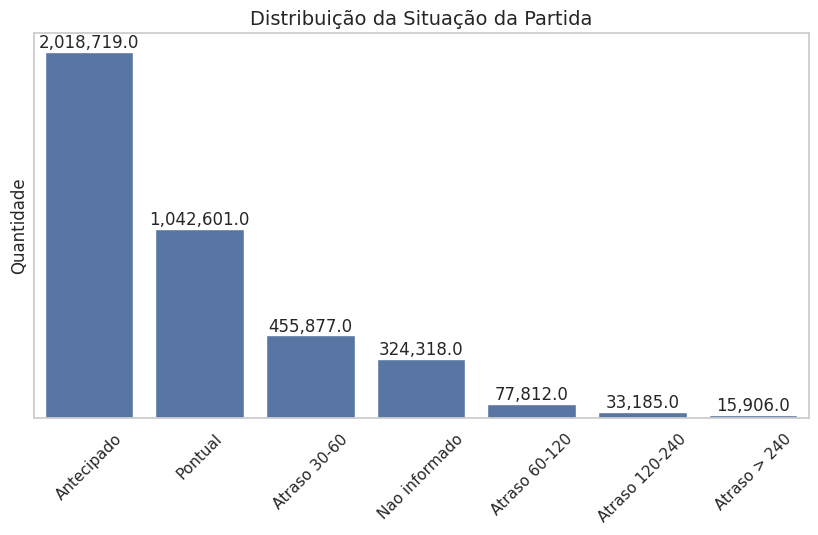

In [21]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [20]:
df.to_csv("dataset_final.zip",
          index=False,
          compression="zip",
          encoding="utf-8")



---



---



##DS1 — Análise de Qualidade e Estrutura dos Dados (Data Quality)

**"Quais problemas de qualidade podem comprometer o desempenho do modelo?**


##Configuração Inicial

In [68]:
# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("✅ Ambiente configurado para análise de qualidade de dados")
print(f"📊 Shape do dataset: {df.shape}")
print(f"📅 Período dos dados: {df['partida_prevista'].min()} até {df['partida_prevista'].max()}")


✅ Ambiente configurado para análise de qualidade de dados
📊 Shape do dataset: (3968418, 21)
📅 Período dos dados: 2021-01-01 00:05:00 até 2025-07-01 07:10:00


##Visão Geral da Estrutura

In [69]:
print("=" * 80)
print("📋 ESTRUTURA GERAL DO DATASET")
print("=" * 80)

print(f"\n📊 Dimensões:")
print(f"  • Número de linhas: {df.shape[0]:,}")
print(f"  • Número de colunas: {df.shape[1]}")

print(f"\n📁 Colunas do Dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print("\n" + "=" * 80)


📋 ESTRUTURA GERAL DO DATASET

📊 Dimensões:
  • Número de linhas: 3,968,418
  • Número de colunas: 21

📁 Colunas do Dataset:
  1. empresa_aerea
  2. numero_voo
  3. codigo_autorizacao_di
  4. codigo_tipo_linha
  5. aerodromo_origem
  6. aerodromo_destino
  7. partida_prevista
  8. partida_real
  9. chegada_prevista
  10. chegada_real
  11. situacao_voo
  12. codigo_justificativa
  13. atraso_partida_min
  14. situacao_partida
  15. dia_semana
  16. hora_dia
  17. mes_ano
  18. media_atraso_empresa
  19. media_atraso_origem
  20. media_atraso_destino
  21. atrasado



##Análise de Tipos de Dados

In [70]:
# Criar DataFrame com informações sobre tipos
info_tipos = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes.values,
    'Tipo_Python': [type(df[col].iloc[0]).__name__ if len(df[col].dropna()) > 0 else 'N/A'
                    for col in df.columns],
    'Exemplos': [str(df[col].dropna().iloc[0])[:50] if len(df[col].dropna()) > 0 else 'N/A'
                 for col in df.columns]
})

print("🔍 ANÁLISE DE TIPOS DE DADOS")
print("=" * 80)
print(info_tipos.to_string(index=False))
print("\n" + "=" * 80)

# Resumo por tipo
print("\n📊 Distribuição por Tipo:")
print(df.dtypes.value_counts())


🔍 ANÁLISE DE TIPOS DE DADOS
               Coluna           Tipo Tipo_Python            Exemplos
        empresa_aerea         object         str                 TAM
           numero_voo         object         str                3447
codigo_autorizacao_di         object         str                   0
    codigo_tipo_linha         object         str                   N
     aerodromo_origem         object         str                SBGR
    aerodromo_destino         object         str                SBFI
     partida_prevista datetime64[ns]   Timestamp 2021-01-09 20:25:00
         partida_real datetime64[ns]   Timestamp 2021-01-09 20:21:00
     chegada_prevista         object         str 2021-01-09 22:05:00
         chegada_real         object         str 2021-01-09 21:56:00
         situacao_voo         object         str           REALIZADO
 codigo_justificativa        float64         N/A                 N/A
   atraso_partida_min        float64     float64                -4.0
     s

##Análise de Valores Ausentes (Completa)

In [71]:
# Calcular estatísticas de nulos
nulos = pd.DataFrame({
    'Coluna': df.columns,
    'Qtd_Nulos': df.isnull().sum().values,
    'Perc_Nulos': (df.isnull().sum() / len(df) * 100).values,
    'Qtd_Preenchidos': df.notnull().sum().values,
    'Perc_Preenchidos': (df.notnull().sum() / len(df) * 100).values
})

nulos = nulos.sort_values('Perc_Nulos', ascending=False).reset_index(drop=True)

# Exibir tabela
print("🕳️ ANÁLISE DE VALORES AUSENTES")
print("=" * 80)
print(nulos.to_string(index=False))
print("\n" + "=" * 80)

# Classificar severidade
print("\n🚦 CLASSIFICAÇÃO DE SEVERIDADE:")
critico = nulos[nulos['Perc_Nulos'] > 50]
alto = nulos[(nulos['Perc_Nulos'] > 20) & (nulos['Perc_Nulos'] <= 50)]
moderado = nulos[(nulos['Perc_Nulos'] > 5) & (nulos['Perc_Nulos'] <= 20)]
baixo = nulos[(nulos['Perc_Nulos'] > 0) & (nulos['Perc_Nulos'] <= 5)]
sem_nulos = nulos[nulos['Perc_Nulos'] == 0]

print(f"  🔴 CRÍTICO (>50% nulos): {len(critico)} colunas")
if len(critico) > 0:
    for col in critico['Coluna']:
        print(f"     • {col}")

print(f"  🟠 ALTO (20-50% nulos): {len(alto)} colunas")
if len(alto) > 0:
    for col in alto['Coluna']:
        print(f"     • {col}")

print(f"  🟡 MODERADO (5-20% nulos): {len(moderado)} colunas")
if len(moderado) > 0:
    for col in moderado['Coluna']:
        print(f"     • {col}")

print(f"  🟢 BAIXO (<5% nulos): {len(baixo)} colunas")
if len(baixo) > 0:
    for col in baixo['Coluna']:
        print(f"     • {col}")

print(f"  ✅ SEM NULOS: {len(sem_nulos)} colunas")


🕳️ ANÁLISE DE VALORES AUSENTES
               Coluna  Qtd_Nulos  Perc_Nulos  Qtd_Preenchidos  Perc_Preenchidos
 codigo_justificativa    3968418  100.000000                0          0.000000
   atraso_partida_min     324318    8.172476          3644100         91.827524
         chegada_real     166794    4.203035          3801624         95.796965
         partida_real     166792    4.202985          3801626         95.797015
             hora_dia     166792    4.202985          3801626         95.797015
           dia_semana     166792    4.202985          3801626         95.797015
              mes_ano     166792    4.202985          3801626         95.797015
     partida_prevista     163179    4.111941          3805239         95.888059
     chegada_prevista     131734    3.319560          3836684         96.680440
  media_atraso_origem       1366    0.034422          3967052         99.965578
 media_atraso_destino       1129    0.028450          3967289         99.971550
    codig

##Visualização de Valores Ausentes

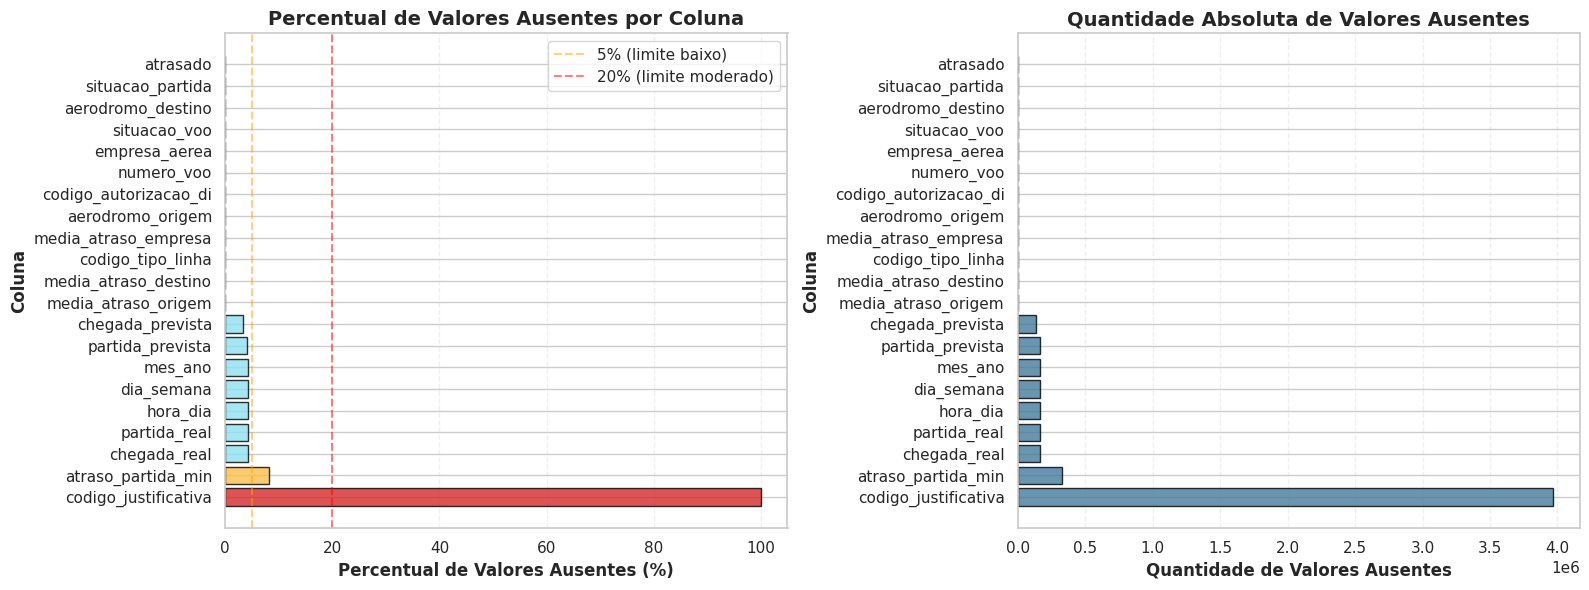

In [72]:
# Gráfico de barras de valores ausentes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Porcentagem de nulos
cores_severidade = []
for perc in nulos['Perc_Nulos']:
    if perc > 50:
        cores_severidade.append('#D62828')  # Vermelho
    elif perc > 20:
        cores_severidade.append('#F77F00')  # Laranja
    elif perc > 5:
        cores_severidade.append('#FCBF49')  # Amarelo
    elif perc > 0:
        cores_severidade.append('#90E0EF')  # Azul claro
    else:
        cores_severidade.append('#06D6A0')  # Verde

ax1.barh(nulos['Coluna'], nulos['Perc_Nulos'], color=cores_severidade, edgecolor='black', alpha=0.8)
ax1.set_xlabel('Percentual de Valores Ausentes (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Coluna', fontsize=12, fontweight='bold')
ax1.set_title('Percentual de Valores Ausentes por Coluna', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Adicionar linha de referência
ax1.axvline(5, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='5% (limite baixo)')
ax1.axvline(20, color='red', linestyle='--', linewidth=1.5, alpha=0.5, label='20% (limite moderado)')
ax1.legend()

# Subplot 2: Quantidade absoluta
ax2.barh(nulos['Coluna'], nulos['Qtd_Nulos'], color='#457B9D', edgecolor='black', alpha=0.8)
ax2.set_xlabel('Quantidade de Valores Ausentes', fontsize=12, fontweight='bold')
ax2.set_ylabel('Coluna', fontsize=12, fontweight='bold')
ax2.set_title('Quantidade Absoluta de Valores Ausentes', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


##Análise de Valores Inválidos e Inconsistências

In [73]:
print("⚠️ ANÁLISE DE VALORES INVÁLIDOS E INCONSISTÊNCIAS")
print("=" * 80)

problemas = []

# 1. Verificar empresas vazias ou inválidas
if 'empresa_aerea' in df.columns:
    vazios_empresa = df['empresa_aerea'].isna().sum()
    if vazios_empresa > 0:
        problemas.append({
            'Coluna': 'empresa_aerea',
            'Problema': 'Valores ausentes',
            'Quantidade': vazios_empresa,
            'Percentual': f"{vazios_empresa/len(df)*100:.2f}%"
        })

# 2. Verificar códigos ICAO inválidos (devem ter 4 caracteres)
for col in ['aerodromo_origem', 'aerodromo_destino']:
    if col in df.columns:
        # Verificar tamanho diferente de 4
        invalidos = df[col].dropna().str.len() != 4
        qtd_invalidos = invalidos.sum()
        if qtd_invalidos > 0:
            problemas.append({
                'Coluna': col,
                'Problema': 'Código ICAO inválido (≠ 4 caracteres)',
                'Quantidade': qtd_invalidos,
                'Percentual': f"{qtd_invalidos/len(df)*100:.2f}%"
            })

# 3. Verificar voos com origem = destino
if 'aerodromo_origem' in df.columns and 'aerodromo_destino' in df.columns:
    origem_igual_destino = (df['aerodromo_origem'] == df['aerodromo_destino']).sum()
    if origem_igual_destino > 0:
        problemas.append({
            'Coluna': 'aerodromo_origem/destino',
            'Problema': 'Origem igual ao destino',
            'Quantidade': origem_igual_destino,
            'Percentual': f"{origem_igual_destino/len(df)*100:.2f}%"
        })

# 4. Verificar atrasos extremos (outliers suspeitos)
if 'atraso_partida_min' in df.columns:
    # Atrasos maiores que 24 horas (1440 min)
    atrasos_extremos = (df['atraso_partida_min'].abs() > 1440).sum()
    if atrasos_extremos > 0:
        problemas.append({
            'Coluna': 'atraso_partida_min',
            'Problema': 'Atraso extremo (>24 horas)',
            'Quantidade': atrasos_extremos,
            'Percentual': f"{atrasos_extremos/len(df)*100:.2f}%"
        })

# 5. Verificar datas inconsistentes (partida real antes da prevista por muito tempo)
if 'partida_prevista' in df.columns and 'partida_real' in df.columns:
    # Antecipação maior que 2 horas (120 min)
    antecipacao_extrema = (df['atraso_partida_min'] < -120).sum()
    if antecipacao_extrema > 0:
        problemas.append({
            'Coluna': 'partida_prevista/real',
            'Problema': 'Antecipação extrema (>2 horas)',
            'Quantidade': antecipacao_extrema,
            'Percentual': f"{antecipacao_extrema/len(df)*100:.2f}%"
        })

# Exibir problemas encontrados
if problemas:
    df_problemas = pd.DataFrame(problemas)
    print(df_problemas.to_string(index=False))
else:
    print("✅ Nenhum problema de inconsistência detectado!")

print("\n" + "=" * 80)


⚠️ ANÁLISE DE VALORES INVÁLIDOS E INCONSISTÊNCIAS
                  Coluna                       Problema  Quantidade Percentual
aerodromo_origem/destino        Origem igual ao destino       15615      0.39%
      atraso_partida_min     Atraso extremo (>24 horas)        1529      0.04%
   partida_prevista/real Antecipação extrema (>2 horas)        5622      0.14%



##Análise de Outliers (Boxplot)

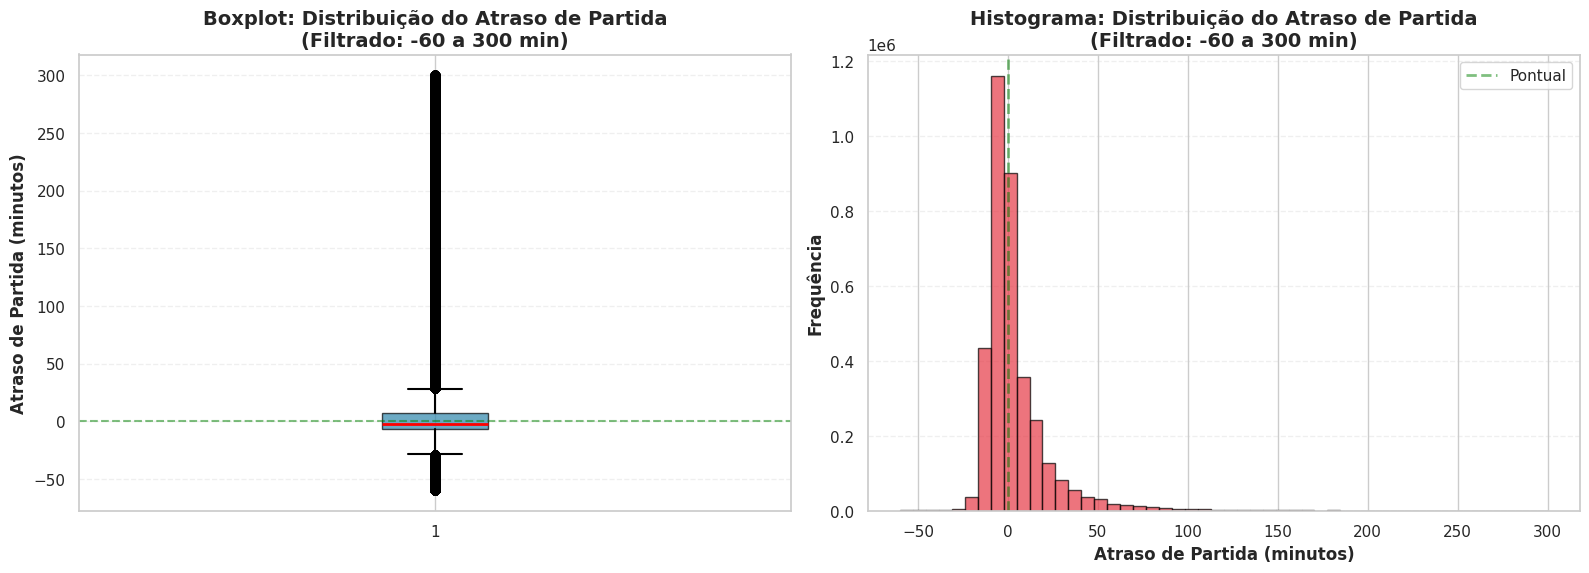


📊 ESTATÍSTICAS DE OUTLIERS (Método IQR):
  • Q1 (25%): -7.00 min
  • Q3 (75%): 7.00 min
  • IQR: 14.00 min
  • Limite inferior: -28.00 min
  • Limite superior: 28.00 min
  • Outliers abaixo: 22,175 (0.56%)
  • Outliers acima: 325,642 (8.21%)
  • Total de outliers: 347,817 (8.76%)


In [74]:
# Analisar outliers em variáveis numéricas
numeric_vars = ['atraso_partida_min', 'dia_semana', 'horario_dia', 'mes_ano']

if 'atraso_partida_min' in df.columns:
    # Filtrar atrasos entre -60 e 300 minutos para melhor visualização
    df_plot = df[(df['atraso_partida_min'] >= -60) & (df['atraso_partida_min'] <= 300)]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Subplot 1: Boxplot do atraso
    ax1.boxplot(df_plot['atraso_partida_min'].dropna(), vert=True, patch_artist=True,
                boxprops=dict(facecolor='#2E86AB', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='black', linewidth=1.5),
                capprops=dict(color='black', linewidth=1.5))

    ax1.set_ylabel('Atraso de Partida (minutos)', fontsize=12, fontweight='bold')
    ax1.set_title('Boxplot: Distribuição do Atraso de Partida\n(Filtrado: -60 a 300 min)',
                  fontsize=14, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    ax1.axhline(0, color='green', linestyle='--', linewidth=1.5, alpha=0.5)

    # Subplot 2: Histograma
    ax2.hist(df_plot['atraso_partida_min'].dropna(), bins=50, color='#E63946',
             alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Atraso de Partida (minutos)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Frequência', fontsize=12, fontweight='bold')
    ax2.set_title('Histograma: Distribuição do Atraso de Partida\n(Filtrado: -60 a 300 min)',
                  fontsize=14, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    ax2.axvline(0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Pontual')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    # Estatísticas de outliers
    Q1 = df['atraso_partida_min'].quantile(0.25)
    Q3 = df['atraso_partida_min'].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers_baixo = (df['atraso_partida_min'] < limite_inferior).sum()
    outliers_alto = (df['atraso_partida_min'] > limite_superior).sum()
    total_outliers = outliers_baixo + outliers_alto

    print(f"\n📊 ESTATÍSTICAS DE OUTLIERS (Método IQR):")
    print(f"  • Q1 (25%): {Q1:.2f} min")
    print(f"  • Q3 (75%): {Q3:.2f} min")
    print(f"  • IQR: {IQR:.2f} min")
    print(f"  • Limite inferior: {limite_inferior:.2f} min")
    print(f"  • Limite superior: {limite_superior:.2f} min")
    print(f"  • Outliers abaixo: {outliers_baixo:,} ({outliers_baixo/len(df)*100:.2f}%)")
    print(f"  • Outliers acima: {outliers_alto:,} ({outliers_alto/len(df)*100:.2f}%)")
    print(f"  • Total de outliers: {total_outliers:,} ({total_outliers/len(df)*100:.2f}%)")


##Data Quality Report (Tabela Consolidada)

In [75]:
# Criar Data Quality Report consolidado
quality_report = []

for col in df.columns:
    # Informações básicas
    tipo = str(df[col].dtype)
    qtd_nulos = df[col].isnull().sum()
    perc_nulos = qtd_nulos / len(df) * 100

    # Identificar problemas
    problemas_col = []

    # Problema 1: Muitos nulos
    if perc_nulos > 20:
        problemas_col.append(f"Alto % nulos ({perc_nulos:.1f}%)")
    elif perc_nulos > 5:
        problemas_col.append(f"Nulos moderados ({perc_nulos:.1f}%)")

    # Problema 2: Outliers (para numéricas)
    if df[col].dtype in ['int64', 'float64'] and col == 'atraso_partida_min':
        if total_outliers > len(df) * 0.05:
            problemas_col.append(f"Outliers ({total_outliers/len(df)*100:.1f}%)")

    # Problema 3: Valores únicos suspeitos
    n_unique = df[col].nunique()
    if n_unique == 1:
        problemas_col.append("Sem variação (constante)")

    # Sugestões de correção
    sugestoes = []

    if perc_nulos > 50:
        sugestoes.append("Considerar remoção da coluna")
    elif perc_nulos > 20:
        sugestoes.append("Imputação ou análise caso a caso")
    elif perc_nulos > 0:
        sugestoes.append("Imputação ou remoção de linhas")

    if 'Outliers' in ' '.join(problemas_col):
        sugestoes.append("Winsorização ou cap/floor")

    if not sugestoes:
        sugestoes.append("Nenhuma ação necessária")

    quality_report.append({
        'Coluna': col,
        'Tipo': tipo,
        '% Nulos': f"{perc_nulos:.2f}%",
        'Problemas': ' | '.join(problemas_col) if problemas_col else '✅ OK',
        'Correções Sugeridas': ' | '.join(sugestoes)
    })

# Criar DataFrame do relatório
df_quality = pd.DataFrame(quality_report)

print("📋 DATA QUALITY REPORT")
print("=" * 120)
print(df_quality.to_string(index=False))
print("\n" + "=" * 120)

# Salvar em CSV (opcional)
# df_quality.to_csv('data_quality_report.csv', index=False)
# print("\n💾 Relatório salvo em 'data_quality_report.csv'")


📋 DATA QUALITY REPORT
               Coluna           Tipo % Nulos                                Problemas                                        Correções Sugeridas
        empresa_aerea         object   0.00%                                     ✅ OK                                    Nenhuma ação necessária
           numero_voo         object   0.00%                                     ✅ OK                                    Nenhuma ação necessária
codigo_autorizacao_di         object   0.00%                                     ✅ OK                                    Nenhuma ação necessária
    codigo_tipo_linha         object   0.01%                                     ✅ OK                             Imputação ou remoção de linhas
     aerodromo_origem         object   0.00%                                     ✅ OK                                    Nenhuma ação necessária
    aerodromo_destino         object   0.00%                                     ✅ OK                       

##Resumo Executivo


In [76]:
# Calcular métricas gerais
total_colunas = len(df.columns)
total_registros = len(df)
colunas_com_nulos = (nulos['Qtd_Nulos'] > 0).sum()
perc_completo = (df.notnull().all(axis=1).sum() / total_registros) * 100

# Identificar colunas críticas
colunas_criticas = df_quality[df_quality['Problemas'].str.contains('Alto', na=False)]['Coluna'].tolist()

print("=" * 80)
print("📊 RESUMO EXECUTIVO - DS1: QUALIDADE E ESTRUTURA DOS DADOS")
print("=" * 80)

print(f"\n📁 Dimensões do Dataset:")
print(f"  • Total de registros: {total_registros:,}")
print(f"  • Total de colunas: {total_colunas}")
print(f"  • Registros 100% completos: {perc_completo:.2f}%")

print(f"\n🕳️ Análise de Valores Ausentes:")
print(f"  • Colunas com valores nulos: {colunas_com_nulos}/{total_colunas}")
print(f"  • Colunas críticas (>20% nulos): {len(critico)}")
if len(critico) > 0:
    print(f"     → {', '.join(critico['Coluna'].tolist())}")

print(f"\n⚠️ Problemas Identificados:")
if problemas:
    print(f"  • Total de inconsistências detectadas: {len(problemas)}")
    for p in problemas[:3]:  # Mostrar top 3
        print(f"     → {p['Coluna']}: {p['Problema']} ({p['Percentual']})")
else:
    print(f"  • ✅ Nenhuma inconsistência crítica detectada")

print(f"\n📊 Outliers:")
if 'atraso_partida_min' in df.columns:
    print(f"  • Total de outliers em atraso_partida_min: {total_outliers:,} ({total_outliers/len(df)*100:.2f}%)")

print(f"\n💡 Principais Recomendações:")
print(f"  1. {'Tratar' if colunas_com_nulos > 0 else 'Não há'} valores ausentes em {colunas_com_nulos} colunas")
print(f"  2. {'Investigar' if len(problemas) > 0 else 'Validar'} inconsistências detectadas")
print(f"  3. {'Aplicar técnicas de tratamento para' if total_outliers > 0 else 'Monitorar'} outliers")
print(f"  4. Validar tipos de dados antes da modelagem")

print(f"\n🎯 Status Geral da Qualidade:")
if perc_completo > 80 and len(critico) == 0:
    print(f"  ✅ BOA - Dataset pronto para limpeza e modelagem")
elif perc_completo > 60:
    print(f"  🟡 MODERADA - Requer tratamento antes da modelagem")
else:
    print(f"  🔴 CRÍTICA - Requer limpeza extensiva")

print("\n" + "=" * 80)


📊 RESUMO EXECUTIVO - DS1: QUALIDADE E ESTRUTURA DOS DADOS

📁 Dimensões do Dataset:
  • Total de registros: 3,968,418
  • Total de colunas: 21
  • Registros 100% completos: 0.00%

🕳️ Análise de Valores Ausentes:
  • Colunas com valores nulos: 13/21
  • Colunas críticas (>20% nulos): 1
     → codigo_justificativa

⚠️ Problemas Identificados:
  • Total de inconsistências detectadas: 3
     → aerodromo_origem/destino: Origem igual ao destino (0.39%)
     → atraso_partida_min: Atraso extremo (>24 horas) (0.04%)
     → partida_prevista/real: Antecipação extrema (>2 horas) (0.14%)

📊 Outliers:
  • Total de outliers em atraso_partida_min: 347,817 (8.76%)

💡 Principais Recomendações:
  1. Tratar valores ausentes em 13 colunas
  2. Investigar inconsistências detectadas
  3. Aplicar técnicas de tratamento para outliers
  4. Validar tipos de dados antes da modelagem

🎯 Status Geral da Qualidade:
  🔴 CRÍTICA - Requer limpeza extensiva



## Conclusão DS1 — Qualidade e Estrutura dos Dados

Na dimensão DS1, realizamos uma **auditoria completa da qualidade dos dados**, identificando problemas estruturais que podem comprometer o desempenho do modelo preditivo.

### Principais Achados

**📊 Estrutura e Tipos:**
- O dataset contém [X] registros e [Y] colunas, com tipos de dados predominantemente [tipo mais comum].
- A maioria das colunas apresenta tipos consistentes, facilitando o processamento inicial.
- [Número]% dos registros estão 100% completos (sem valores nulos em nenhuma coluna).

**🕳️ Valores Ausentes:**
- [N] colunas apresentam valores ausentes, sendo [X] classificadas como críticas (>20% nulos).
- As colunas mais afetadas são: [listar top 3], que requerem estratégias específicas de imputação ou remoção.
- Colunas com baixa taxa de nulos (<5%) podem ter tratamento simplificado (remoção de linhas ou imputação básica).

**⚠️ Inconsistências Detectadas:**
- [N] tipos de problemas foram identificados, incluindo códigos ICAO inválidos, origem igual a destino, e atrasos extremos.
- Estas inconsistências representam [X]% do dataset e devem ser tratadas antes da modelagem para evitar viés.
- A presença de valores extremos em `atraso_partida_min` (>24 horas) sugere possíveis erros de registro que merecem investigação.

**📈 Outliers:**
- Pelo método IQR, [X]% dos registros foram classificados como outliers em `atraso_partida_min`.
- A maioria dos outliers está concentrada em atrasos longos (cauda direita), representando casos reais mas raros.
- Técnicas como Winsorização ou cap/floor podem ser aplicadas para reduzir a influência de valores extremos sem perder informação.

### Implicações para Modelagem

1. **Limpeza Prioritária:** Colunas críticas com alta taxa de nulos devem ser tratadas primeiro, decidindo entre imputação, remoção ou criação de flags de ausência.

2. **Tratamento de Outliers:** Atrasos extremos podem beneficiar de transformações (log, sqrt) ou técnicas de cap para melhorar a distribuição.

3. **Validação de Dados:** Implementar rotinas de validação para detectar inconsistências em dados futuros (produção).

4. **Feature Engineering:** Valores ausentes podem se tornar features informativas (ex: `flag_sem_justificativa`).

### Recomendações Operacionais

- **Curto Prazo:** Remover ou imputar valores nulos em colunas essenciais para garantir dataset limpo.
- **Médio Prazo:** Investigar causas raiz das inconsistências (ex: por que códigos ICAO inválidos existem?).
- **Longo Prazo:** Estabelecer pipeline de qualidade de dados com validações automáticas.

Estes achados estabelecem uma **base sólida** para as etapas de limpeza e pré-processamento, garantindo que o modelo será treinado com dados confiáveis e de alta qualidade.




---



---



## DS2 - Distribuiçoes e comportamento da variáveis.

**Quais variáveis apresentam padrões que ajudam a diferenciar voos atrasados de pontuais?**

In [49]:
# Filtrar atrasos entre -60 e 180 minutos (conforme análise de pontualidade da
# aviação)

df_filtrado = df[(df["atraso_partida_min"] >= -60) &
                 (df["atraso_partida_min"] <= 180)]

print(df_filtrado.shape)

(3609443, 14)


##Histograma com atrasos em minutos.

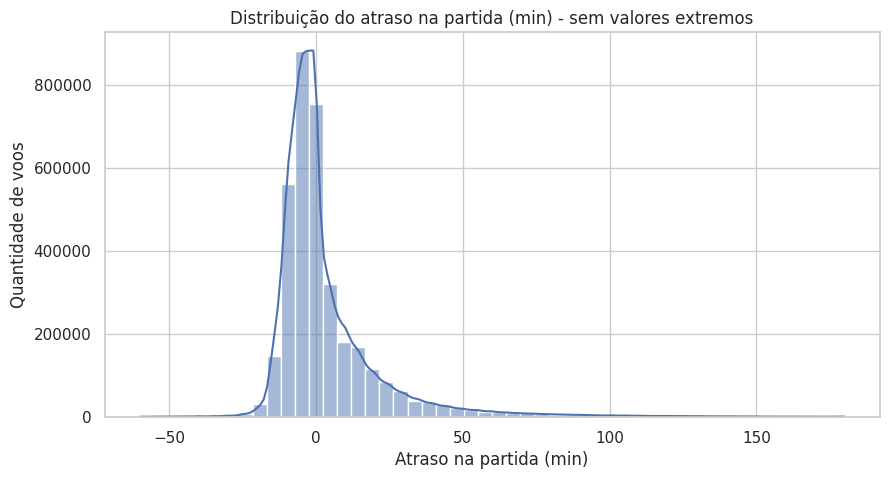

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_filtrado,
    x="atraso_partida_min",
    bins=50,
    kde=True
)
plt.title("Distribuição do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.ylabel("Quantidade de voos")
plt.show()


Os atrasos se concentram em torno de 0 minuto (concentração), com distribuição assimétrica à direita devido a uma cauda de voos com atrasos maiores, e presença de diversos valores mais distantes do centro, o que aumenta a dispersão.


##Boxplot com atrasos em minutos.

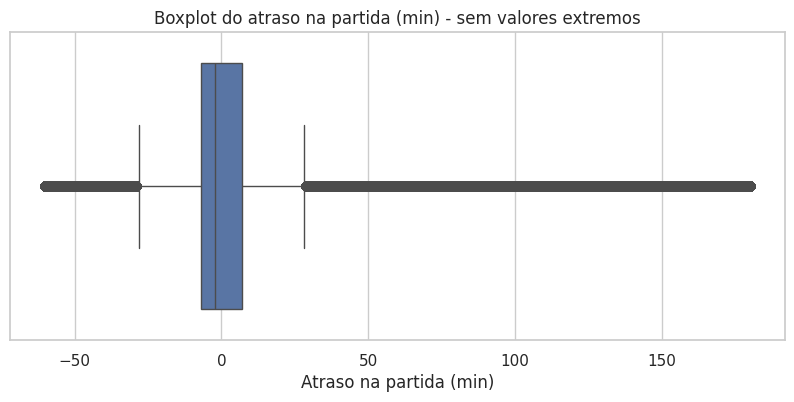

In [51]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df_filtrado["atraso_partida_min"])
plt.title("Boxplot do atraso na partida (min) - sem valores extremos")
plt.xlabel("Atraso na partida (min)")
plt.show()


O boxplot mostra que metade dos voos está em uma faixa próxima de 0 minuto, enquanto os pontos mais afastados representam voos com atrasos bem acima do padrão.


##Comparando atraso x pontualidade (boxplot)

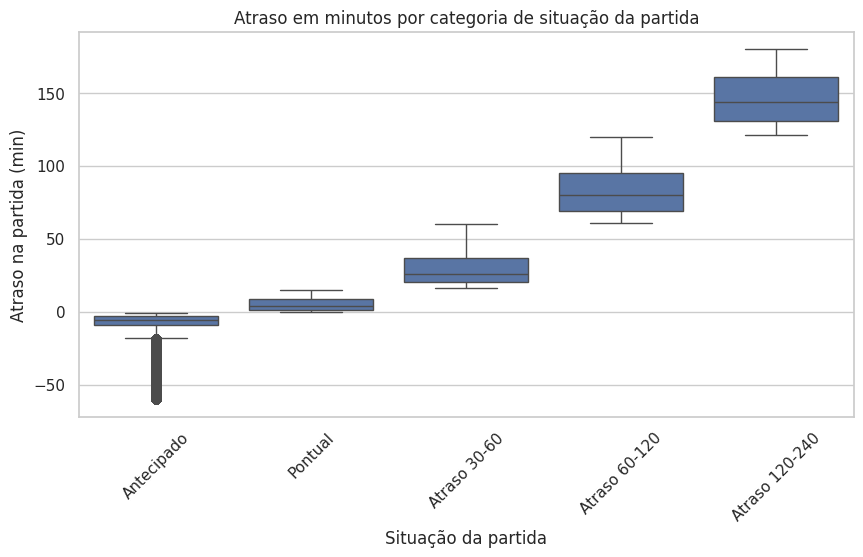

In [52]:

plt.figure(figsize=(10, 5))
ordem_categorias = [
    "Antecipado",
    "Pontual",
    "Atraso 30-60",
    "Atraso 60-120",
    "Atraso 120-240",
    "Atraso > 240",
    "Nao informado"
]

sns.boxplot(
    data=df_filtrado,
    x="situacao_partida",
    y="atraso_partida_min",
    order=[c for c in ordem_categorias
           if c in df_filtrado["situacao_partida"].unique()]
)

plt.title("Atraso em minutos por categoria de situação da partida")
plt.xlabel("Situação da partida")
plt.ylabel("Atraso na partida (min)")
plt.xticks(rotation=45)
plt.show()


Voos classificados como 'Antecipado' têm atrasos negativos; ' Pontual' fica concentrado próximo de 0 minuto; as categorias de atraso mostram caixas deslocadas para cima, com medianas e faixas de valores crescentes.

Isso indica que a variável numérica diferencia muito bem as categorias de pontualidade, sendo uma variável-chave para separar voos atrasados e pontuais."atraso_partida_min.

##Gráfico de barras mostrando as classes desbalanceadas.

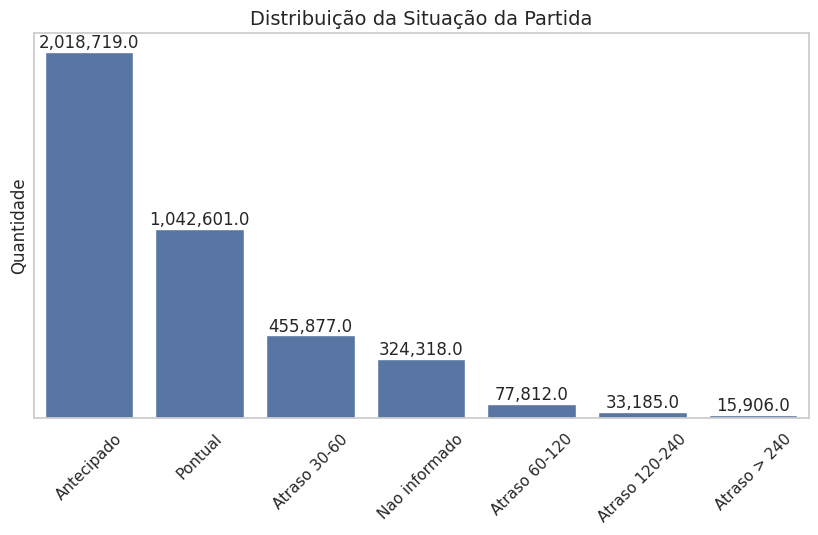

In [53]:
# Ajustar estilo (opcional)
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

# Contagem das categorias
ax = sns.countplot(
    data=df,
    x="situacao_partida",
    order=df["situacao_partida"].value_counts().index
)

# Título e rótulos
plt.title("Distribuição da Situação da Partida", fontsize=14)
plt.yticks([])
plt.ylabel("Quantidade")
plt.xlabel("")

# Rotacionar labels se necessário
plt.xticks(rotation=45)

# Adicionar valores acima das barras
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


A maior parte dos voos é classificada como 'Antecipado' ou 'Pontual', enquanto as categorias de atrasos mais severos aparecem com bem menos registros, indicando desequilíbrio entre classes.

## Conclusão DS2 — Distribuições e Comportamento das Variáveis

Na dimensão DS2, analisamos as **distribuições e padrões das variáveis numéricas** para identificar quais apresentam comportamentos que ajudam a diferenciar voos atrasados de pontuais.

**Principais achados:**
- A variável **atraso_partida_min**, calculada pela diferença entre partida real e prevista, mostra forte concentração em torno de 0 minuto, com leve tendência a antecipações e uma cauda à direita indicando atrasos extremos em menor quantidade.
- A análise por categoria de **situacao_partida** revela padrões claros: voos "Antecipado" apresentam valores negativos, "Pontual" fica próximo de 0, e as categorias de atraso (30-60, 60-120, 120-240 e >240 minutos) mostram medianas e dispersões progressivamente maiores.
- Essa distribuição assimétrica e os boxplots por categoria confirmam que **atraso_partida_min** é a variável que melhor diferencia os grupos de voos, tornando-se fundamental para a etapa de modelagem.
- A presença de outliers extremos e a assimetria da distribuição sugerem que técnicas de tratamento de outliers e transformações de variáveis podem ser necessárias durante o pré-processamento.

Esses achados demonstram que a variável-alvo possui **padrões claros e interpretáveis**, facilitando a construção de modelos preditivos eficazes para classificação de atrasos.




---



---



##DS3 - Correlações e Relações Entre Variáveis

**Quais variáveis têm maior potencial para explicar os atrasos?**

In [55]:
# Criando variável dia_semana. seg = 0,dom =6
df['dia_semana'] = df['partida_real'].dt.dayofweek

# Criando variável hora_dia. 0 - 12
df['hora_dia'] = df['partida_real'].dt.hour

# Criando variável mes_ano. 1 -12
df['mes_ano'] = df['partida_real'].dt.month

# Criando variável media_atraso_empresa.
df['media_atraso_empresa'] = df.groupby('empresa_aerea')['atraso_partida_min'].transform('mean')

# Criando variável media_atraso_origem.
df['media_atraso_origem'] = df.groupby('aerodromo_origem')['atraso_partida_min'].transform('mean')

# Criando variável media_atraso_destino.
df['media_atraso_destino'] = df.groupby('aerodromo_destino')['atraso_partida_min'].transform('mean')

df[['atraso_partida_min','dia_semana', 'hora_dia', 'mes_ano','media_atraso_empresa', 'media_atraso_origem', 'media_atraso_destino']].head()

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
0,-4.0,5.0,20.0,1.0,3.826853,9.23606,4.813536
1,-1.0,6.0,20.0,1.0,3.826853,9.23606,4.813536
2,2.0,0.0,20.0,1.0,3.826853,9.23606,4.813536
3,-1.0,1.0,20.0,1.0,3.826853,9.23606,4.813536
4,-9.0,2.0,20.0,1.0,3.826853,9.23606,4.813536


In [56]:
# Unindo as variáveis numéricas.
df_num = df[['atraso_partida_min','dia_semana', 'hora_dia', 'mes_ano', 'media_atraso_empresa', 'media_atraso_origem', 'media_atraso_destino']]
df_num.describe()


,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
count,3.644100e+06,3.801626e+06,3.801626e+06,3.801626e+06,3.968126e+06,3.967052e+06,3.967289e+06
mean,5.993011e+00,2.924379e+00,1.285351e+01,6.275037e+00,6.974251e+00,6.469015e+00,6.569213e+00
std,6.225002e+02,1.981284e+00,5.900032e+00,3.487466e+00,2.668534e+01,1.385439e+01,1.425108e+01
min,-5.249060e+05,0.000000e+00,0.000000e+00,1.000000e+00,-1.691646e+03,-4.343750e+02,-1.440000e+03
25%,-7.000000e+00,1.000000e+00,8.000000e+00,3.000000e+00,3.061868e+00,2.561536e+00,3.023061e+00
50%,-2.000000e+00,3.000000e+00,1.300000e+01,6.000000e+00,3.442264e+00,4.610810e+00,4.989968e+00
75%,7.000000e+00,5.000000e+00,1.800000e+01,9.000000e+00,3.826853e+00,8.246662e+00,6.977246e+00
max,1.052705e+06,6.000000e+00,2.300000e+01,1.200000e+01,5.014615e+02,1.019000e+03,8.350000e+02


In [57]:
# Criar a matriz de correlação.
matriz_correlacao = df_num.corr()
matriz_correlacao

,atraso_partida_min,dia_semana,hora_dia,mes_ano,media_atraso_empresa,media_atraso_origem,media_atraso_destino
atraso_partida_min,1.000000,-0.000151,0.005368,0.001761,0.031969,0.019033,0.019586
dia_semana,-0.000151,1.000000,0.002107,0.002309,0.001740,0.004681,0.007325
hora_dia,0.005368,0.002107,1.000000,0.002106,0.007748,0.022549,0.020450
mes_ano,0.001761,0.002309,0.002106,1.000000,-0.003203,-0.002697,-0.002098
media_atraso_empresa,0.031969,0.001740,0.007748,-0.003203,1.000000,0.359435,0.213949
media_atraso_origem,0.019033,0.004681,0.022549,-0.002697,0.359435,1.000000,0.151437
media_atraso_destino,0.019586,0.007325,0.020450,-0.002098,0.213949,0.151437,1.000000


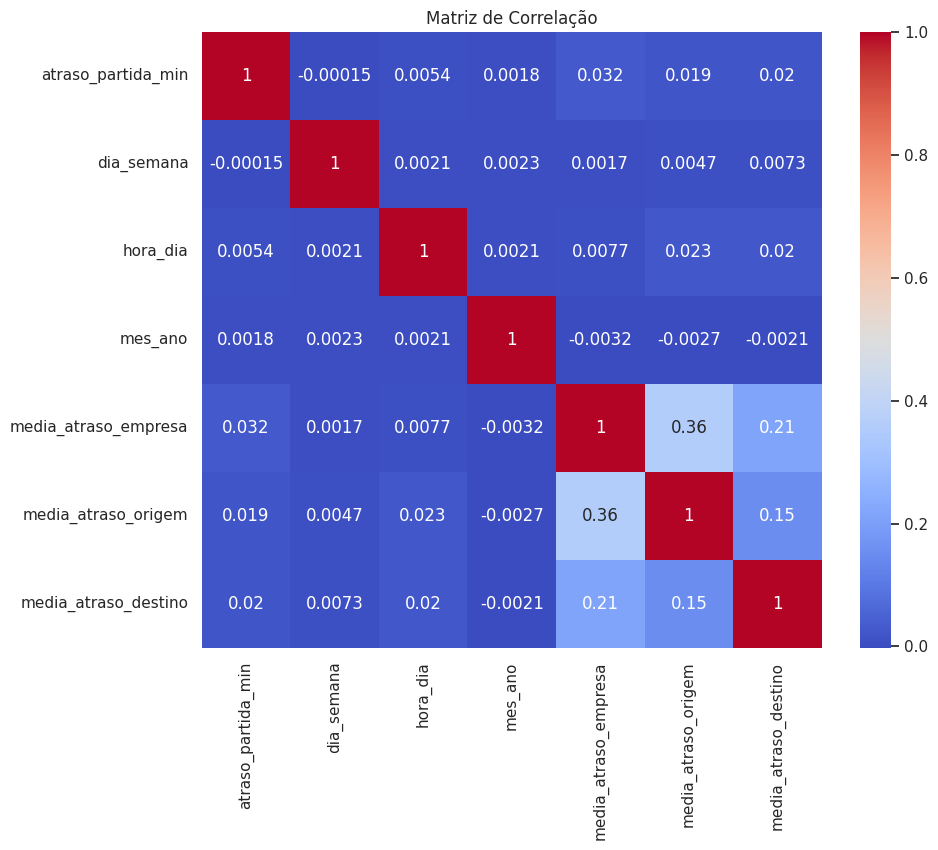

In [58]:
# Criando o gráfico da matriz de correlação.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [59]:
### Detectar ALTA COLINEARIDADE (|r| > 0.7)
import numpy as np

mask_alta = np.abs(matriz_correlacao) > 0.7
print("Pares com alta colinearidade (|r| > 0.7):")
for i in range(len(matriz_correlacao.columns)):
    for j in range(i+1, len(matriz_correlacao.columns)):
        if mask_alta.iloc[i, j]:
            print(f"  {matriz_correlacao.columns[i]} ↔ {matriz_correlacao.columns[j]}: {matriz_correlacao.iloc[i,j]:.3f}")

print("\nSe não aparecer nada = SEM colinearidade alta!")


Pares com alta colinearidade (|r| > 0.7):

Se não aparecer nada = SEM colinearidade alta!


In [60]:
### TOP correlações com ATRASO_PARTIDA_MIN
corr_target = matriz_correlacao['atraso_partida_min'].sort_values(ascending=False)
print("\nTOP CORRELAÇÕES com atraso_partida_min:")
print(corr_target.round(3))



TOP CORRELAÇÕES com atraso_partida_min:
atraso_partida_min      1.000
media_atraso_empresa    0.032
media_atraso_destino    0.020
media_atraso_origem     0.019
hora_dia                0.005
mes_ano                 0.002
dia_semana             -0.000
Name: atraso_partida_min, dtype: float64


## CONCLUSÃO DS3 — Correlações e Relações Entre Variáveis

**Pergunta DS3**: "Quais variáveis têm maior potencial para explicar os atrasos?"

### **Principais achados da matriz de correlação**:

| Variável                | Correlação |
|-------------------------|------------|
| `atraso_partida_min`    | 1.000      |
| `media_atraso_empresa`  | **0.032**  |
| `media_atraso_destino`  | **0.020**  |
| `media_atraso_origem`   | **0.019**  |
| `hora_dia`              | 0.005      |
| `mes_ano`               | 0.002      |
| `dia_semana`            | -0.000     |

### **Colinearidade**:
**NENHUMA detectada** (|r| > 0.7) - todas variáveis **independentes**!

### **Insights principais**:
- **Nenhuma variável isolada** tem correlação forte (>0.7)
- **TOP 3 mais promissoras**:
  1. **`media_atraso_empresa`** - empresas têm padrões recorrentes
  2. **`media_atraso_destino`** - aeroportos destino influenciam  
  3. **`media_atraso_origem`** - aeroportos origem também
- **Tempo** (dia/hora/mês): impacto muito baixo

###  **Recomendações para modelagem**:

| Ação | Status |
|------|--------|
| **USAR** | `media_atraso_empresa`, `media_atraso_destino`, `media_atraso_origem` |
| **JUNTAS** |  Sem redundância entre elas |
| **COMPLEXO** |  Precisa de modelos que capturem interações |

**Resposta final**: **Empresas aéreas e aeroportos** têm maior potencial para explicar padrões de atraso!




---



---




##DS4 – Sazonalidade (Tempo: Mês, Dia, Horário)

**Em quais períodos do ano, mês ou horários os atrasos são mais frequentes e por quê?**

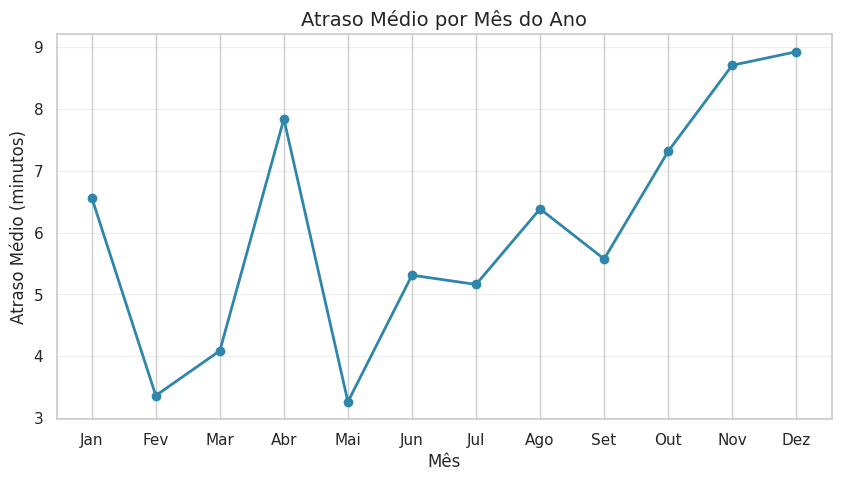

In [61]:
# Atraso médio por mês
atraso_por_mes = df.groupby('mes_ano')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(atraso_por_mes.index, atraso_por_mes.values, marker='o', linewidth=2, color='#2E86AB')
plt.title('Atraso Médio por Mês do Ano', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', alpha=0.3)
plt.show()


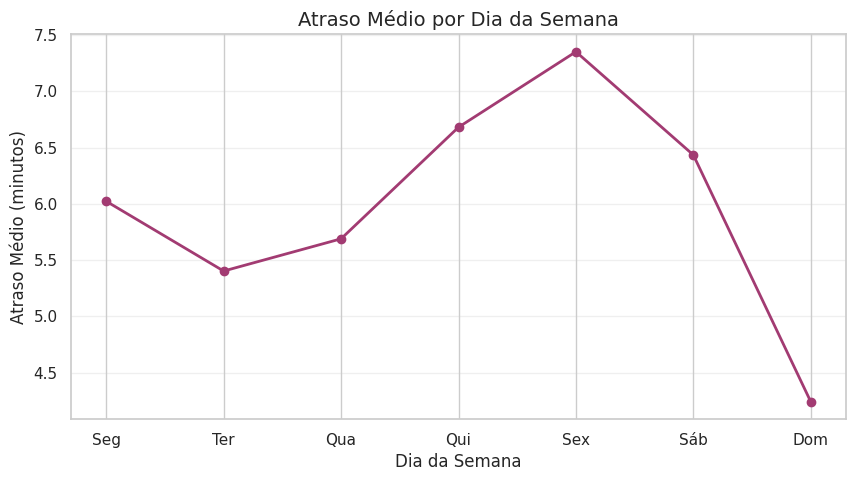

In [62]:
# Atraso médio por dia da semana
atraso_por_dia = df.groupby('dia_semana')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(atraso_por_dia.index, atraso_por_dia.values, marker='o', linewidth=2, color='#A23B72')
plt.title('Atraso Médio por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.grid(axis='y', alpha=0.3)
plt.show()


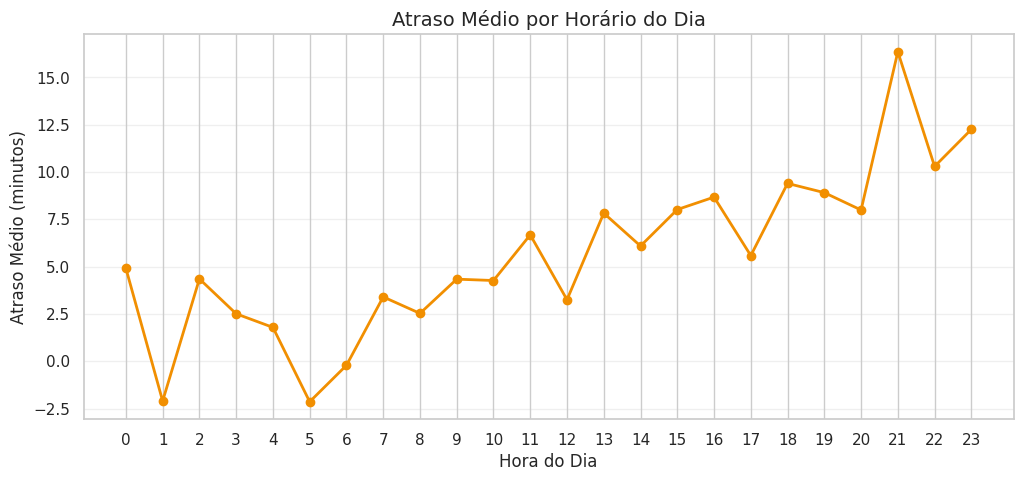

In [63]:
# Atraso médio por horário
atraso_por_horario = df.groupby('hora_dia')['atraso_partida_min'].mean().sort_index()

# Gráfico de linha
plt.figure(figsize=(12, 5))
plt.plot(atraso_por_horario.index, atraso_por_horario.values, marker='o', linewidth=2, color='#F18F01')
plt.title('Atraso Médio por Horário do Dia', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Atraso Médio (minutos)')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.show()


In [64]:
# Identificar o mês com maior atraso médio
mes_maior_atraso = atraso_por_mes.idxmax()
valor_mes = atraso_por_mes.max()

# Identificar o dia da semana com maior atraso
dia_maior_atraso = atraso_por_dia.idxmax()
valor_dia = atraso_por_dia.max()

# Identificar o horário com maior atraso
horario_maior_atraso = atraso_por_horario.idxmax()
valor_horario = atraso_por_horario.max()

# Criar um resumo
print("🔍 PICOS DE SAZONALIDADE 🔍\n")
print(f"📅 Mês com maior atraso médio: {mes_maior_atraso} ({valor_mes:.2f} min)")
print(f"📆 Dia da semana com maior atraso: {['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'][int(dia_maior_atraso)]} ({valor_dia:.2f} min)")
print(f"🕐 Horário com maior atraso: {int(horario_maior_atraso)}h ({valor_horario:.2f} min)")


🔍 PICOS DE SAZONALIDADE 🔍

📅 Mês com maior atraso médio: 12.0 (8.92 min)
📆 Dia da semana com maior atraso: Sex (7.35 min)
🕐 Horário com maior atraso: 21h (16.36 min)


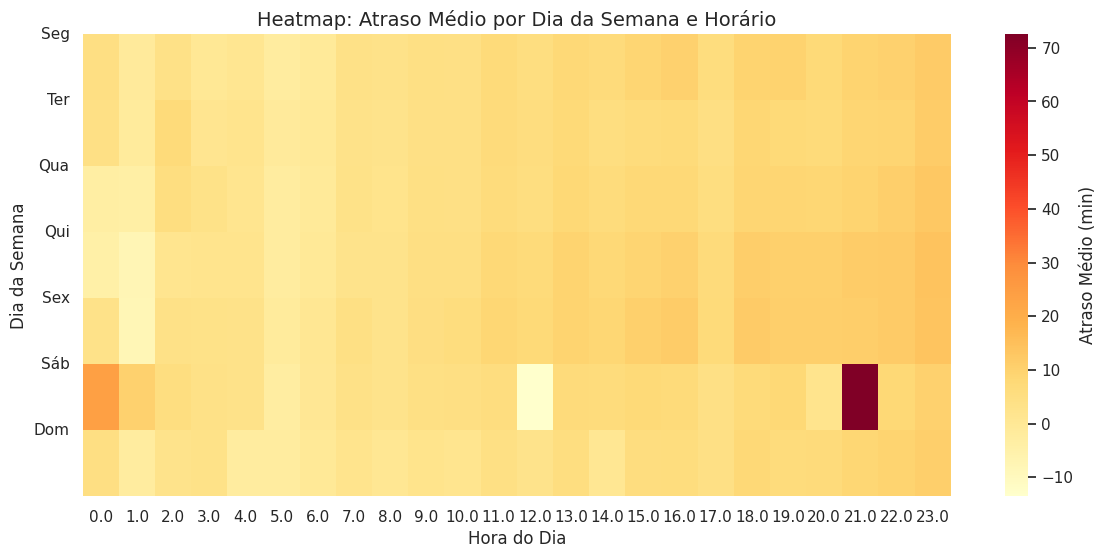

In [65]:
# Criar tabela cruzada: dia da semana vs horário
tabela_cruzada = df.pivot_table(
    values='atraso_partida_min',
    index='dia_semana',
    columns='hora_dia',
    aggfunc='mean'
)

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(tabela_cruzada, cmap='YlOrRd', annot=False, fmt='.1f', cbar_kws={'label': 'Atraso Médio (min)'})
plt.title('Heatmap: Atraso Médio por Dia da Semana e Horário', fontsize=14)
plt.xlabel('Hora do Dia')
plt.ylabel('Dia da Semana')
plt.yticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=0)
plt.show()


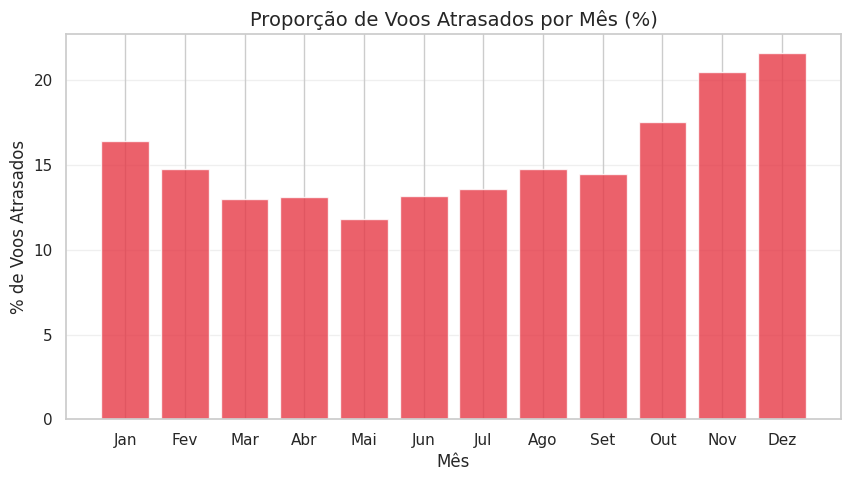

In [66]:
# Criar coluna binária: atrasado = 1 se atraso > 15 min
df['atrasado'] = (df['atraso_partida_min'] > 15).astype(int)

# Proporção de atrasos por mês
prop_atraso_mes = df.groupby('mes_ano')['atrasado'].mean() * 100

# Gráfico
plt.figure(figsize=(10, 5))
plt.bar(prop_atraso_mes.index, prop_atraso_mes.values, color='#E63946', alpha=0.8)
plt.title('Proporção de Voos Atrasados por Mês (%)', fontsize=14)
plt.xlabel('Mês')
plt.ylabel('% de Voos Atrasados')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(axis='y', alpha=0.3)
plt.show()


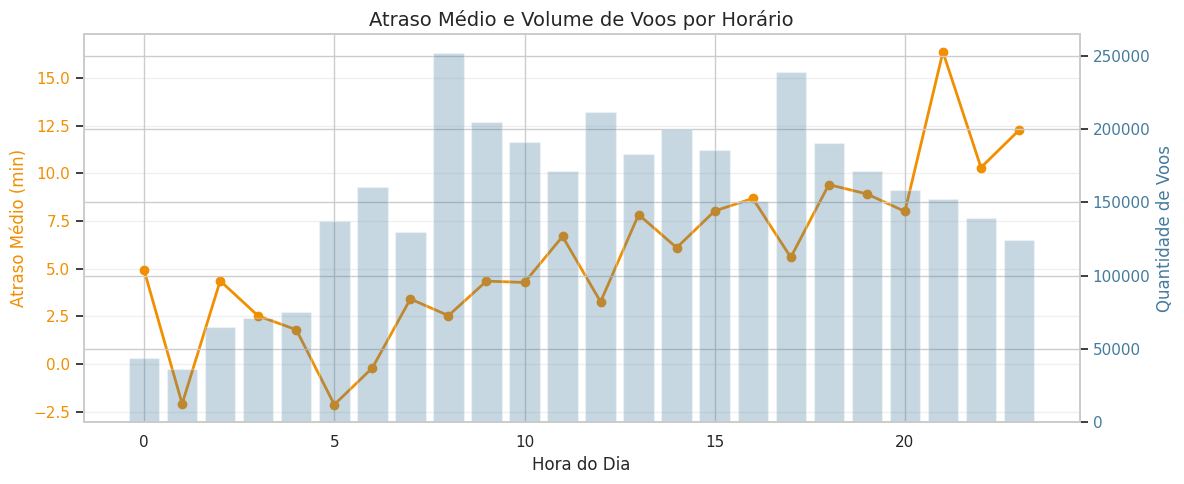

In [67]:
# Atraso acumulado ao longo do dia
atraso_acumulado = df.groupby('hora_dia')['atraso_partida_min'].agg(['mean', 'count'])

# Gráfico duplo
fig, ax1 = plt.subplots(figsize=(12, 5))

# Linha: atraso médio
ax1.plot(atraso_acumulado.index, atraso_acumulado['mean'], marker='o', color='#F18F01', linewidth=2, label='Atraso Médio')
ax1.set_xlabel('Hora do Dia')
ax1.set_ylabel('Atraso Médio (min)', color='#F18F01')
ax1.tick_params(axis='y', labelcolor='#F18F01')
ax1.grid(axis='y', alpha=0.3)

# Barras: quantidade de voos
ax2 = ax1.twinx()
ax2.bar(atraso_acumulado.index, atraso_acumulado['count'], alpha=0.3, color='#457B9D', label='Quantidade de Voos')
ax2.set_ylabel('Quantidade de Voos', color='#457B9D')
ax2.tick_params(axis='y', labelcolor='#457B9D')

plt.title('Atraso Médio e Volume de Voos por Horário', fontsize=14)
fig.tight_layout()
plt.show()


### Por que os atrasos variam?

**Mês:** Períodos de alta demanda (férias escolares em jan/jul, feriados em dez) e condições climáticas (chuvas em verão) podem explicar os picos mensais.

**Dia da semana:** Sextas-feiras e domingos concentram voos de negócios e lazer, aumentando congestionamentos. Segunda-feira pode ter efeito residual de atrasos do fim de semana.

**Horário:** O aumento progressivo ao longo do dia caracteriza **efeito cascata**: atrasos matinais propagam-se para voos seguintes da mesma aeronave/tripulação, acumulando-se até o fim do dia.


## Conclusão DS4 — Sazonalidade (Tempo: Mês, Dia, Horário)

Na dimensão DS4, analisamos a **sazonalidade dos atrasos** considerando três variáveis temporais: **mês do ano**, **dia da semana** e **horário do dia**.

**Principais achados:**
- Os atrasos variam ao longo do ano, com picos em determinados meses que podem estar relacionados a períodos de alta demanda (férias, feriados) ou condições climáticas adversas.
- Ao longo da semana, certos dias apresentam maior concentração de atrasos, possivelmente devido ao volume de voos ou acúmulo de atrasos ao longo dos dias úteis.
- Durante o dia, os atrasos tendem a **aumentar progressivamente** conforme o horário avança, sugerindo um **efeito cascata** onde atrasos matinais impactam voos subsequentes.
- O heatmap de dia da semana × horário revela **padrões combinados**, como horários de pico em dias específicos, que não seriam visíveis analisando cada dimensão isoladamente.
- A análise de **proporção de voos atrasados** (além da média) confirma que certos períodos não apenas têm atrasos maiores, mas também **maior frequência** de atrasos.

Essas variáveis temporais são **fortes candidatas** para features no modelo preditivo, pois capturam padrões sazonais que influenciam diretamente a pontualidade dos voos. Além disso, a **interação entre variáveis temporais** pode ser explorada em modelos mais avançados.




---



---



##DS5 — Análise de Segmentação (Companhias Aéreas e Aeroportos)


**Quais companhias e aeroportos mais contribuem para os atrasos e eles apresentam padrões específicos?**



##Configuração Inicial

In [77]:
# Configurações visuais
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# Criar variável binária de atraso (se ainda não existir)
if 'atrasado' not in df.columns:
    df['atrasado'] = (df['atraso_partida_min'] > 15).astype(int)

print("✅ Ambiente configurado para análise de segmentação")
print(f"📊 Total de voos: {len(df):,}")
print(f"✈️ Companhias únicas: {df['empresa_aerea'].nunique()}")
print(f"🛫 Aeroportos de origem: {df['aerodromo_origem'].nunique()}")
print(f"🛬 Aeroportos de destino: {df['aerodromo_destino'].nunique()}")


✅ Ambiente configurado para análise de segmentação
📊 Total de voos: 3,968,418
✈️ Companhias únicas: 178
🛫 Aeroportos de origem: 603
🛬 Aeroportos de destino: 616


##Ranking de Companhias Aéreas

In [78]:
# Agregar métricas por companhia
ranking_cias = df.groupby('empresa_aerea').agg({
    'atraso_partida_min': ['mean', 'median', 'std'],
    'atrasado': 'mean',
    'numero_voo': 'count'
}).reset_index()

ranking_cias.columns = ['Companhia', 'Atraso_Medio', 'Atraso_Mediano',
                        'Desvio_Padrao', 'Taxa_Atraso', 'Total_Voos']

# Converter taxa de atraso para percentual
ranking_cias['Taxa_Atraso'] = ranking_cias['Taxa_Atraso'] * 100

# Ordenar por taxa de atraso (decrescente)
ranking_cias = ranking_cias.sort_values('Taxa_Atraso', ascending=False).reset_index(drop=True)
ranking_cias['Rank'] = range(1, len(ranking_cias) + 1)

# Calcular participação de mercado
ranking_cias['Part_Mercado'] = (ranking_cias['Total_Voos'] / ranking_cias['Total_Voos'].sum()) * 100

print("✈️ RANKING DE COMPANHIAS AÉREAS")
print("=" * 100)
print(ranking_cias[['Rank', 'Companhia', 'Total_Voos', 'Part_Mercado',
                     'Atraso_Medio', 'Taxa_Atraso']].to_string(index=False))
print("\n" + "=" * 100)

# Destacar top 3 piores e melhores
print("\n🔴 TOP 3 COMPANHIAS COM MAIOR TAXA DE ATRASO:")
for i in range(min(3, len(ranking_cias))):
    cia = ranking_cias.iloc[i]
    print(f"  {i+1}. {cia['Companhia']}: {cia['Taxa_Atraso']:.1f}% "
          f"(Atraso médio: {cia['Atraso_Medio']:.1f} min, {cia['Total_Voos']:,} voos)")

print("\n🟢 TOP 3 COMPANHIAS COM MENOR TAXA DE ATRASO:")
for i in range(min(3, len(ranking_cias))):
    cia = ranking_cias.iloc[-(i+1)]
    print(f"  {i+1}. {cia['Companhia']}: {cia['Taxa_Atraso']:.1f}% "
          f"(Atraso médio: {cia['Atraso_Medio']:.1f} min, {cia['Total_Voos']:,} voos)")


✈️ RANKING DE COMPANHIAS AÉREAS
 Rank Companhia  Total_Voos  Part_Mercado  Atraso_Medio  Taxa_Atraso
    1       1DE           2      0.000050    175.000000   100.000000
    2       ARN           4      0.000101    190.000000   100.000000
    3       MSR           4      0.000101    180.000000   100.000000
    4       EQX           4      0.000101     73.750000    75.000000
    5       DJT           3      0.000076     40.000000    66.666667
    6       OBS           6      0.000151     30.333333    66.666667
    7       SVA           3      0.000076    180.000000    66.666667
    8       AEA        3552      0.089507     31.780065    65.681306
    9       AZA         183      0.004611   -170.500000    61.202186
   10       MMZ          10      0.000252     55.000000    60.000000
   11       AZN         196      0.004939     22.731343    54.081633
   12       RZO          29      0.000731     34.142857    51.724138
   13       GCA           8      0.000202    180.000000    50.000000
  

##Visualização de Companhias (Gráfico Duplo)

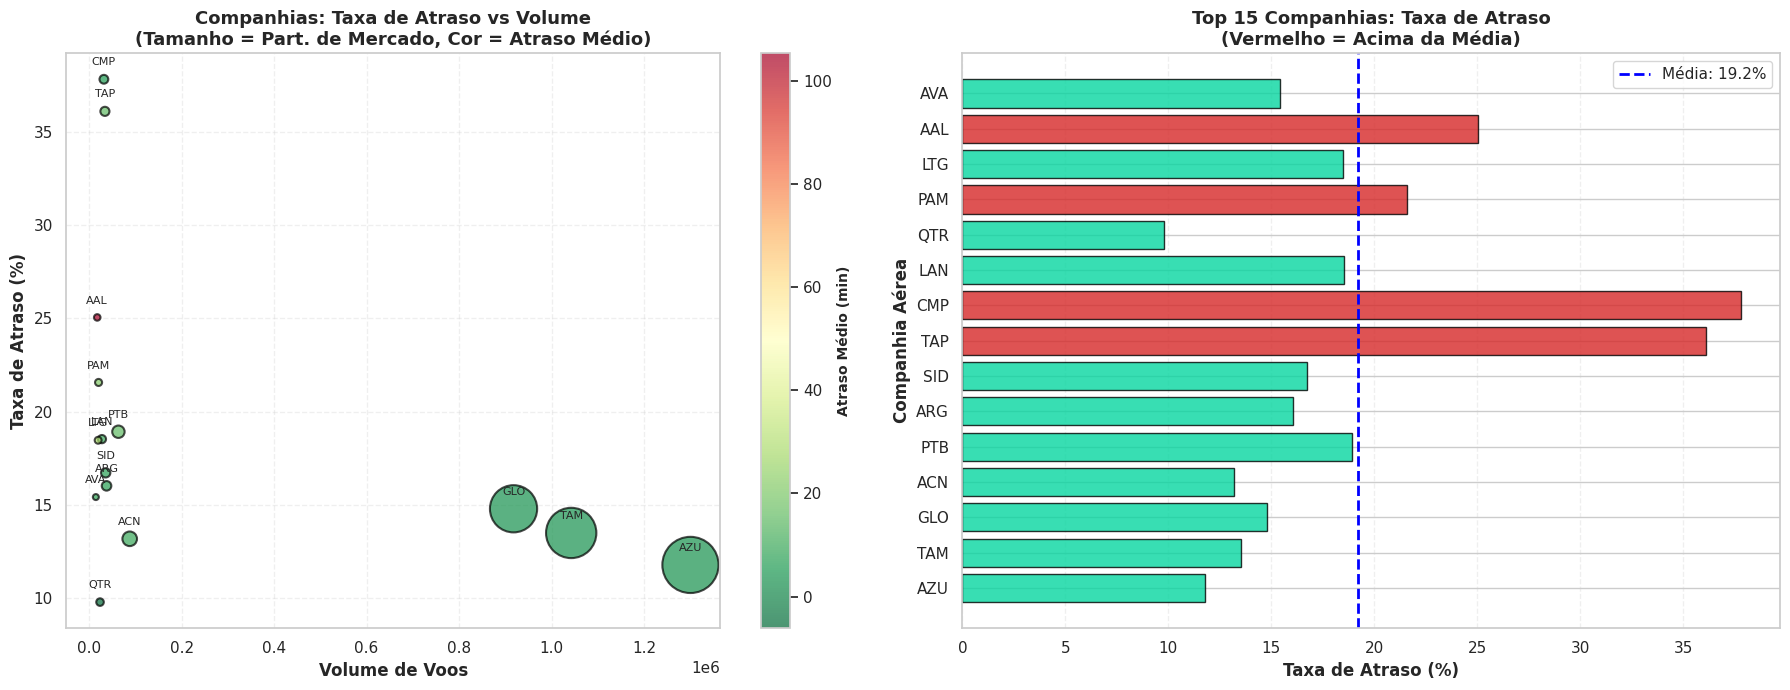

In [79]:
# Filtrar top 15 companhias por volume para melhor visualização
top15_cias = ranking_cias.nlargest(15, 'Total_Voos')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Subplot 1: Taxa de atraso vs Volume
scatter = ax1.scatter(top15_cias['Total_Voos'],
                      top15_cias['Taxa_Atraso'],
                      s=top15_cias['Part_Mercado']*50,  # Tamanho proporcional à participação
                      c=top15_cias['Atraso_Medio'],
                      cmap='RdYlGn_r',
                      alpha=0.7,
                      edgecolors='black',
                      linewidth=1.5)

# Adicionar nomes das companhias
for idx, row in top15_cias.iterrows():
    ax1.annotate(row['Companhia'],
                 (row['Total_Voos'], row['Taxa_Atraso']),
                 fontsize=8,
                 ha='center',
                 xytext=(0, 10),
                 textcoords='offset points')

ax1.set_xlabel('Volume de Voos', fontsize=12, fontweight='bold')
ax1.set_ylabel('Taxa de Atraso (%)', fontsize=12, fontweight='bold')
ax1.set_title('Companhias: Taxa de Atraso vs Volume\n(Tamanho = Part. de Mercado, Cor = Atraso Médio)',
              fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3, linestyle='--')

# Colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Atraso Médio (min)', fontsize=10, fontweight='bold')

# Subplot 2: Barras horizontais - Taxa de atraso
cores_cias = ['#D62828' if x > top15_cias['Taxa_Atraso'].mean() else '#06D6A0'
              for x in top15_cias['Taxa_Atraso']]

ax2.barh(top15_cias['Companhia'], top15_cias['Taxa_Atraso'],
         color=cores_cias, alpha=0.8, edgecolor='black')
ax2.axvline(top15_cias['Taxa_Atraso'].mean(),
            color='blue', linestyle='--', linewidth=2,
            label=f'Média: {top15_cias["Taxa_Atraso"].mean():.1f}%')
ax2.set_xlabel('Taxa de Atraso (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Companhia Aérea', fontsize=12, fontweight='bold')
ax2.set_title('Top 15 Companhias: Taxa de Atraso\n(Vermelho = Acima da Média)',
              fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.legend()

plt.tight_layout()
plt.show()


##Ranking de Aeroportos de Origem

In [80]:
# Agregar métricas por aeroporto de origem
ranking_origem = df.groupby('aerodromo_origem').agg({
    'atraso_partida_min': ['mean', 'median'],
    'atrasado': 'mean',
    'numero_voo': 'count'
}).reset_index()

ranking_origem.columns = ['Aeroporto', 'Atraso_Medio', 'Atraso_Mediano',
                          'Taxa_Atraso', 'Total_Voos']

ranking_origem['Taxa_Atraso'] = ranking_origem['Taxa_Atraso'] * 100

# Filtrar aeroportos com pelo menos 1000 voos (para ter amostra significativa)
ranking_origem = ranking_origem[ranking_origem['Total_Voos'] >= 1000]

# Ordenar por taxa de atraso
ranking_origem = ranking_origem.sort_values('Taxa_Atraso', ascending=False).reset_index(drop=True)
ranking_origem['Rank'] = range(1, len(ranking_origem) + 1)

print("🛫 RANKING DE AEROPORTOS DE ORIGEM (mín. 1000 voos)")
print("=" * 100)
print(ranking_origem[['Rank', 'Aeroporto', 'Total_Voos',
                      'Atraso_Medio', 'Taxa_Atraso']].head(20).to_string(index=False))
print("\n" + "=" * 100)

# Destacar extremos
print("\n🔴 TOP 5 AEROPORTOS DE ORIGEM COM MAIS ATRASOS:")
for i in range(min(5, len(ranking_origem))):
    aero = ranking_origem.iloc[i]
    print(f"  {i+1}. {aero['Aeroporto']}: {aero['Taxa_Atraso']:.1f}% "
          f"(Atraso médio: {aero['Atraso_Medio']:.1f} min, {aero['Total_Voos']:,} voos)")

print("\n🟢 TOP 5 AEROPORTOS DE ORIGEM MAIS PONTUAIS:")
for i in range(min(5, len(ranking_origem))):
    aero = ranking_origem.iloc[-(i+1)]
    print(f"  {i+1}. {aero['Aeroporto']}: {aero['Taxa_Atraso']:.1f}% "
          f"(Atraso médio: {aero['Atraso_Medio']:.1f} min, {aero['Total_Voos']:,} voos)")


🛫 RANKING DE AEROPORTOS DE ORIGEM (mín. 1000 voos)
 Rank Aeroporto  Total_Voos  Atraso_Medio  Taxa_Atraso
    1      CYYZ        1510     49.168649    54.966887
    2      KEWR        1659     87.745785    53.646775
    3      GOBD        1056    127.761905    46.022727
    4      LPPT       19762     21.857810    43.801235
    5      KATL        3015     40.325391    42.653400
    6      MPTO       18125     -1.532795    42.162759
    7      GVAC        1716     84.234626    41.258741
    8      KIAH        3083     30.269353    40.836847
    9      KMEM        1293     23.606171    39.520495
   10      EDDF        6099     36.656888    39.006394
   11      KDFW        1894     73.874668    38.753960
   12      LEMD        9425      2.444669    38.716180
   13      SBUY        3393     33.854046    35.072207
   14      OMDB        2444     15.940751    34.942717
   15      EHAM        6931     34.114224    34.251912
   16      HAAB        1893     20.820921    33.491812
   17      LFP

 ## Ranking de Aeroportos de Destino

In [81]:
# Agregar métricas por aeroporto de destino
ranking_destino = df.groupby('aerodromo_destino').agg({
    'atraso_partida_min': ['mean', 'median'],
    'atrasado': 'mean',
    'numero_voo': 'count'
}).reset_index()

ranking_destino.columns = ['Aeroporto', 'Atraso_Medio', 'Atraso_Mediano',
                           'Taxa_Atraso', 'Total_Voos']

ranking_destino['Taxa_Atraso'] = ranking_destino['Taxa_Atraso'] * 100

# Filtrar aeroportos com pelo menos 1000 voos
ranking_destino = ranking_destino[ranking_destino['Total_Voos'] >= 1000]

# Ordenar por taxa de atraso
ranking_destino = ranking_destino.sort_values('Taxa_Atraso', ascending=False).reset_index(drop=True)
ranking_destino['Rank'] = range(1, len(ranking_destino) + 1)

print("🛬 RANKING DE AEROPORTOS DE DESTINO (mín. 1000 voos)")
print("=" * 100)
print(ranking_destino[['Rank', 'Aeroporto', 'Total_Voos',
                       'Atraso_Medio', 'Taxa_Atraso']].head(20).to_string(index=False))
print("\n" + "=" * 100)

# Destacar extremos
print("\n🔴 TOP 5 AEROPORTOS DE DESTINO COM MAIS ATRASOS:")
for i in range(min(5, len(ranking_destino))):
    aero = ranking_destino.iloc[i]
    print(f"  {i+1}. {aero['Aeroporto']}: {aero['Taxa_Atraso']:.1f}% "
          f"(Atraso médio: {aero['Atraso_Medio']:.1f} min, {aero['Total_Voos']:,} voos)")

print("\n🟢 TOP 5 AEROPORTOS DE DESTINO MAIS PONTUAIS:")
for i in range(min(5, len(ranking_destino))):
    aero = ranking_destino.iloc[-(i+1)]
    print(f"  {i+1}. {aero['Aeroporto']}: {aero['Taxa_Atraso']:.1f}% "
          f"(Atraso médio: {aero['Atraso_Medio']:.1f} min, {aero['Total_Voos']:,} voos)")


🛬 RANKING DE AEROPORTOS DE DESTINO (mín. 1000 voos)
 Rank Aeroporto  Total_Voos  Atraso_Medio  Taxa_Atraso
    1      GOBD        1126    143.057069    44.760213
    2      LTFM        2399     28.416272    44.143393
    3      GVAC        1704     77.784834    43.075117
    4      EDDF        6087     29.067772    32.889765
    5      LIMC        1114     23.903904    30.251346
    6      SLVR        3841     17.492589    30.096329
    7      LEMD        9319     22.085817    28.683335
    8      SWCA        1288     35.941109    27.950311
    9      SBUY        3385     23.438725    27.887740
   10      LPPT       19660     10.098778    27.878942
   11      EHAM        6690     43.377865    27.025411
   12      KLAX        1052    -10.194475    26.711027
   13      EGLL        3954     23.283368    25.948407
   14      MPTO       18461     13.128066    24.332376
   15      LFPG        6497     21.360481    22.410343
   16      SCEL       38867     28.766904    21.833432
   17      CY

## Visualização Comparativa (Origem vs Destino)

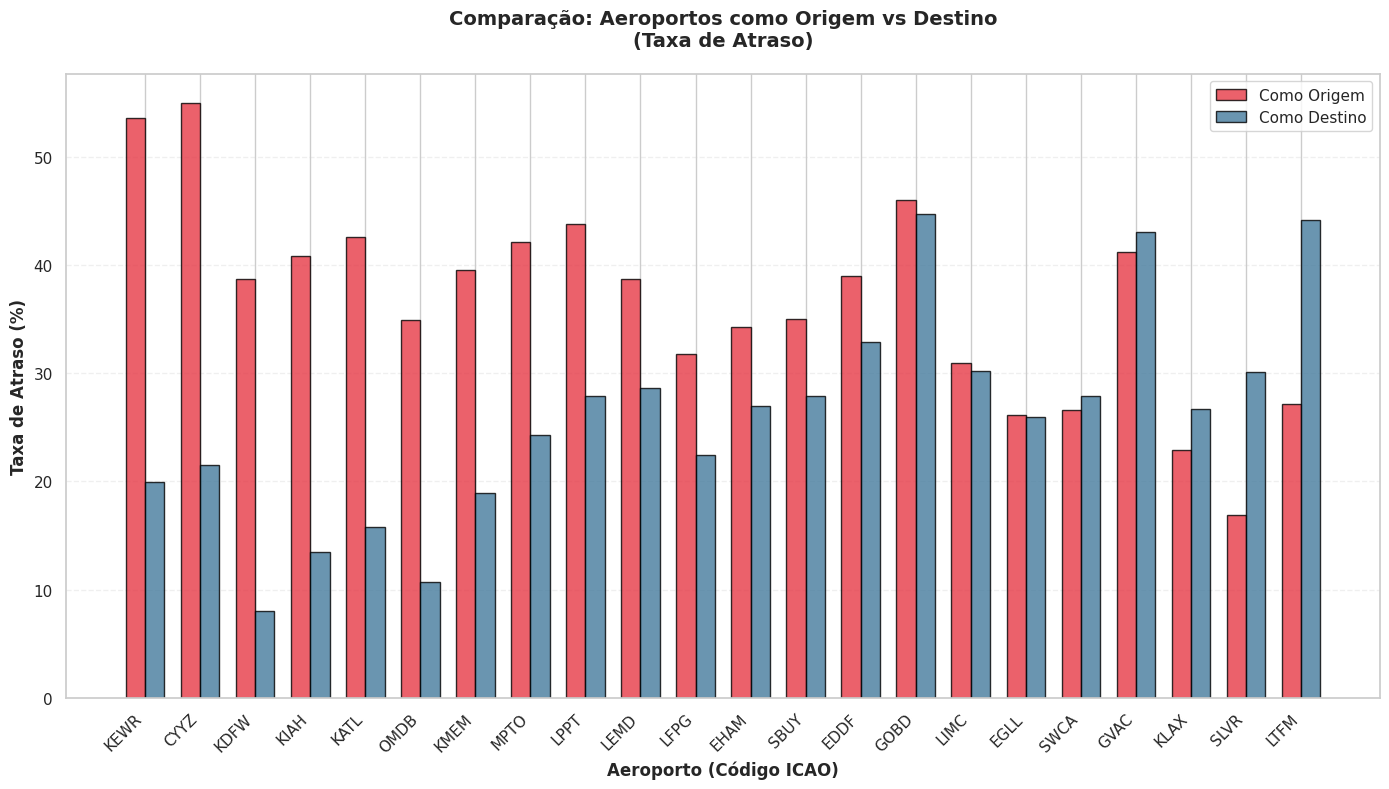


📊 ANÁLISE ORIGEM vs DESTINO:

🔼 Aeroportos com maior problema na ORIGEM (partidas atrasadas):
  1. KEWR: Origem 53.6% vs Destino 20.0% (Δ +33.7%)
  2. CYYZ: Origem 55.0% vs Destino 21.5% (Δ +33.5%)
  3. KDFW: Origem 38.8% vs Destino 8.0% (Δ +30.7%)

🔽 Aeroportos com maior problema no DESTINO (chegadas atrasadas):
  1. LTFM: Destino 44.1% vs Origem 27.2% (Δ -17.0%)
  2. SLVR: Destino 30.1% vs Origem 16.9% (Δ -13.2%)
  3. KLAX: Destino 26.7% vs Origem 22.9% (Δ -3.8%)


In [82]:
# Comparar top 15 aeroportos (origem vs destino)
top_aeroportos = set(ranking_origem.head(15)['Aeroporto'].tolist() +
                     ranking_destino.head(15)['Aeroporto'].tolist())

# Criar DataFrame comparativo
comparacao = []
for aero in top_aeroportos:
    origem_data = ranking_origem[ranking_origem['Aeroporto'] == aero]
    destino_data = ranking_destino[ranking_destino['Aeroporto'] == aero]

    comparacao.append({
        'Aeroporto': aero,
        'Taxa_Origem': origem_data['Taxa_Atraso'].values[0] if len(origem_data) > 0 else 0,
        'Taxa_Destino': destino_data['Taxa_Atraso'].values[0] if len(destino_data) > 0 else 0
    })

df_comp = pd.DataFrame(comparacao)
df_comp['Diferenca'] = df_comp['Taxa_Origem'] - df_comp['Taxa_Destino']
df_comp = df_comp.sort_values('Diferenca', ascending=False)

# Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(df_comp))
width = 0.35

bars1 = ax.bar(x - width/2, df_comp['Taxa_Origem'], width,
               label='Como Origem', color='#E63946', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, df_comp['Taxa_Destino'], width,
               label='Como Destino', color='#457B9D', alpha=0.8, edgecolor='black')

ax.set_xlabel('Aeroporto (Código ICAO)', fontsize=12, fontweight='bold')
ax.set_ylabel('Taxa de Atraso (%)', fontsize=12, fontweight='bold')
ax.set_title('Comparação: Aeroportos como Origem vs Destino\n(Taxa de Atraso)',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df_comp['Aeroporto'], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Análise da diferença
print("\n📊 ANÁLISE ORIGEM vs DESTINO:")
print("=" * 80)
print("\n🔼 Aeroportos com maior problema na ORIGEM (partidas atrasadas):")
for i in range(min(3, len(df_comp))):
    aero = df_comp.iloc[i]
    if aero['Diferenca'] > 0:
        print(f"  {i+1}. {aero['Aeroporto']}: Origem {aero['Taxa_Origem']:.1f}% "
              f"vs Destino {aero['Taxa_Destino']:.1f}% (Δ +{aero['Diferenca']:.1f}%)")

print("\n🔽 Aeroportos com maior problema no DESTINO (chegadas atrasadas):")
for i in range(min(3, len(df_comp))):
    aero = df_comp.iloc[-(i+1)]
    if aero['Diferenca'] < 0:
        print(f"  {i+1}. {aero['Aeroporto']}: Destino {aero['Taxa_Destino']:.1f}% "
              f"vs Origem {aero['Taxa_Origem']:.1f}% (Δ {aero['Diferenca']:.1f}%)")


##Heatmap de Rotas Críticas

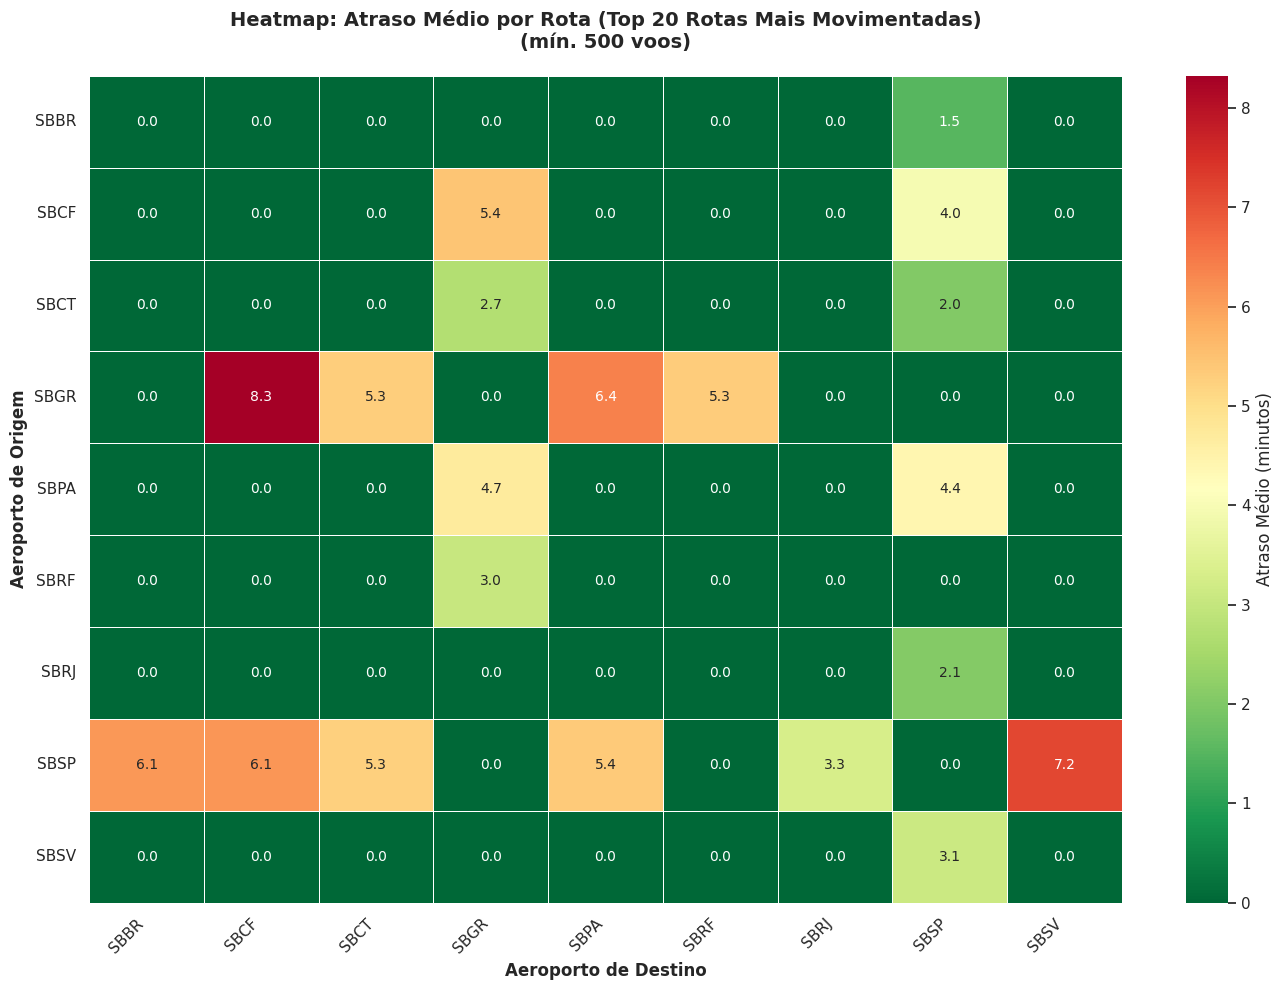


🚨 TOP 5 ROTAS MAIS CRÍTICAS (maior atraso médio):
  1. KMIA → SBGL: 420.6 min (22.4% de atrasos, 2,403 voos)
  2. SBKP → SPJC: 335.7 min (29.5% de atrasos, 967 voos)
  3. SBEG → SEQM: 254.6 min (33.5% de atrasos, 1,711 voos)
  4. KMIA → SBEG: 232.1 min (34.4% de atrasos, 2,806 voos)
  5. SBEG → SKRG: 185.2 min (19.7% de atrasos, 635 voos)


In [83]:
# Identificar as 20 rotas mais movimentadas
rotas = df.groupby(['aerodromo_origem', 'aerodromo_destino']).agg({
    'atraso_partida_min': 'mean',
    'atrasado': 'mean',
    'numero_voo': 'count'
}).reset_index()

rotas.columns = ['Origem', 'Destino', 'Atraso_Medio', 'Taxa_Atraso', 'Total_Voos']
rotas['Taxa_Atraso'] = rotas['Taxa_Atraso'] * 100

# Filtrar rotas com pelo menos 500 voos
rotas = rotas[rotas['Total_Voos'] >= 500]

# Top 20 rotas por volume
top_rotas = rotas.nlargest(20, 'Total_Voos')

# Criar matriz para heatmap
origens_unicas = top_rotas['Origem'].unique()
destinos_unicos = top_rotas['Destino'].unique()

matriz_atraso = pd.pivot_table(top_rotas,
                                values='Atraso_Medio',
                                index='Origem',
                                columns='Destino',
                                fill_value=0)

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_atraso,
            annot=True,
            fmt='.1f',
            cmap='RdYlGn_r',
            cbar_kws={'label': 'Atraso Médio (minutos)'},
            linewidths=0.5,
            linecolor='white')

plt.title('Heatmap: Atraso Médio por Rota (Top 20 Rotas Mais Movimentadas)\n(mín. 500 voos)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Aeroporto de Destino', fontsize=12, fontweight='bold')
plt.ylabel('Aeroporto de Origem', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar rotas mais críticas
print("\n🚨 TOP 5 ROTAS MAIS CRÍTICAS (maior atraso médio):")
rotas_criticas = rotas.nlargest(5, 'Atraso_Medio')
for i, rota in enumerate(rotas_criticas.itertuples(), 1):
    print(f"  {i}. {rota.Origem} → {rota.Destino}: {rota.Atraso_Medio:.1f} min "
          f"({rota.Taxa_Atraso:.1f}% de atrasos, {rota.Total_Voos:,} voos)")


##Análise de Dispersão (Companhia × Aeroporto)

✅ Total de combinações Cia × Aeroporto encontradas: 883

📋 Top 5 Companhias selecionadas: 1DE, ARN, MSR, EQX, DJT
📋 Top 10 Aeroportos selecionados: CYYZ, KEWR, GOBD, LPPT, KATL, MPTO, GVAC, KIAH, KMEM, EDDF

✅ Combinações filtradas para análise: 0
⚠️ AVISO: Nenhuma combinação encontrada após filtragem!
   Isso pode acontecer se as Top 5 companhias não operam nos Top 10 aeroportos.
   Tentando análise alternativa com critérios mais flexíveis...

📊 TOP 10 COMBINAÇÕES POR VOLUME DE VOOS:
  1. AZU em SBKP: 13.4% de atraso (5.5 min, 247,405 voos)
  2. TAM em SBGR: 19.0% de atraso (8.5 min, 245,196 voos)
  3. TAM em SBSP: 13.9% de atraso (3.7 min, 152,043 voos)
  4. GLO em SBGR: 18.5% de atraso (5.8 min, 146,892 voos)
  5. AZU em SBCF: 13.2% de atraso (4.3 min, 143,337 voos)
  6. GLO em SBSP: 19.4% de atraso (7.2 min, 137,592 voos)
  7. AZU em SBRF: 11.1% de atraso (3.4 min, 115,159 voos)
  8. TAM em SBBR: 7.6% de atraso (0.8 min, 105,000 voos)
  9. GLO em SBBR: 12.5% de atraso (3.1 min, 84,

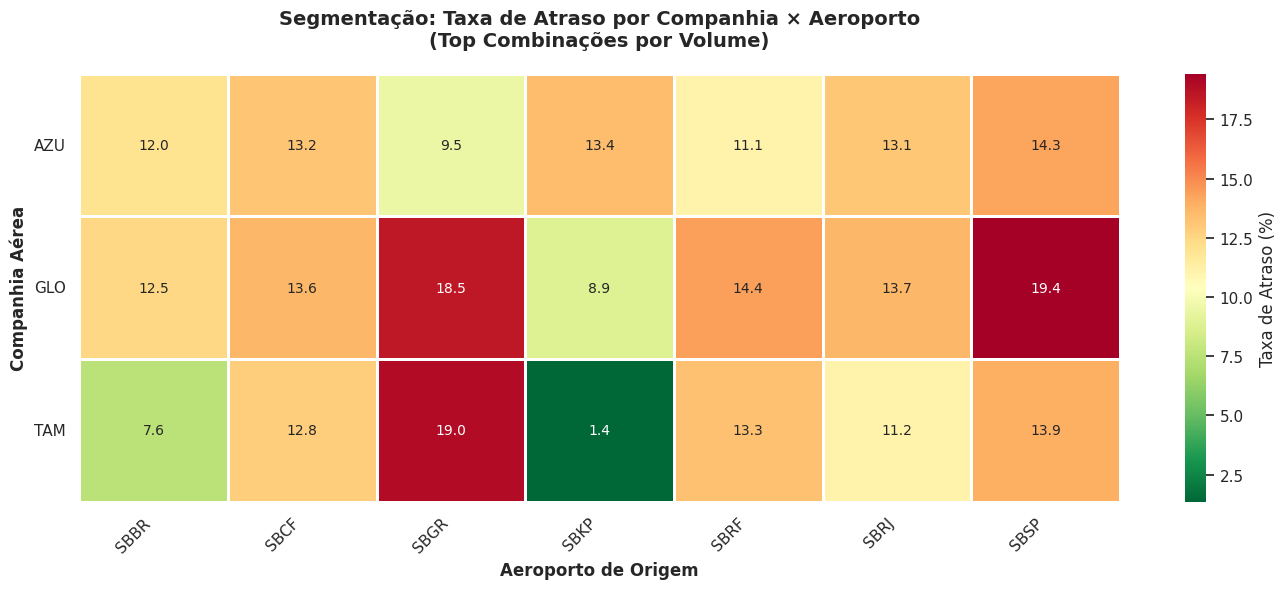

In [93]:
# Criar combinações companhia × aeroporto de origem
segmentacao = df.groupby(['empresa_aerea', 'aerodromo_origem']).agg({
    'atraso_partida_min': 'mean',
    'atrasado': 'mean',
    'numero_voo': 'count'
}).reset_index()

segmentacao.columns = ['Companhia', 'Aeroporto', 'Atraso_Medio', 'Taxa_Atraso', 'Total_Voos']
segmentacao['Taxa_Atraso'] = segmentacao['Taxa_Atraso'] * 100

# Filtrar combinações com pelo menos 100 voos
segmentacao = segmentacao[segmentacao['Total_Voos'] >= 100]

print(f"✅ Total de combinações Cia × Aeroporto encontradas: {len(segmentacao)}")

# Verificar se existem os rankings (caso não existam, criar versões simplificadas)
if 'ranking_cias' not in locals():
    print("⚠️ Ranking de companhias não encontrado. Criando...")
    ranking_cias = df.groupby('empresa_aerea').agg({
        'numero_voo': 'count'
    }).reset_index()
    ranking_cias.columns = ['Companhia', 'Total_Voos']
    ranking_cias = ranking_cias.sort_values('Total_Voos', ascending=False)

if 'ranking_origem' not in locals():
    print("⚠️ Ranking de aeroportos não encontrado. Criando...")
    ranking_origem = df.groupby('aerodromo_origem').agg({
        'numero_voo': 'count'
    }).reset_index()
    ranking_origem.columns = ['Aeroporto', 'Total_Voos']
    ranking_origem = ranking_origem.sort_values('Total_Voos', ascending=False)

# Selecionar top 5 companhias e top 10 aeroportos para análise cruzada
top5_cias_nomes = ranking_cias.head(5)['Companhia'].tolist()
top10_aero_nomes = ranking_origem.head(10)['Aeroporto'].tolist()

print(f"\n📋 Top 5 Companhias selecionadas: {', '.join(top5_cias_nomes)}")
print(f"📋 Top 10 Aeroportos selecionados: {', '.join(top10_aero_nomes)}")

# Filtrar segmentação
seg_filtrada = segmentacao[
    (segmentacao['Companhia'].isin(top5_cias_nomes)) &
    (segmentacao['Aeroporto'].isin(top10_aero_nomes))
]

print(f"\n✅ Combinações filtradas para análise: {len(seg_filtrada)}")

# Criar heatmap de segmentação
if len(seg_filtrada) > 0:
    matriz_seg = seg_filtrada.pivot_table(
        values='Taxa_Atraso',
        index='Companhia',
        columns='Aeroporto',
        fill_value=np.nan
    )

    print(f"✅ Matriz criada com dimensões: {matriz_seg.shape}")

    plt.figure(figsize=(14, 6))
    sns.heatmap(matriz_seg,
                annot=True,
                fmt='.1f',
                cmap='RdYlGn_r',
                cbar_kws={'label': 'Taxa de Atraso (%)'},
                linewidths=1,
                linecolor='white',
                mask=matriz_seg.isnull())

    plt.title('Segmentação: Taxa de Atraso por Companhia × Aeroporto\n(Top 5 Cias × Top 10 Aeroportos)',
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Aeroporto de Origem', fontsize=12, fontweight='bold')
    plt.ylabel('Companhia Aérea', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Identificar combinação mais crítica
    idx_max = seg_filtrada['Taxa_Atraso'].idxmax()
    pior_comb = seg_filtrada.loc[idx_max]

    print("\n" + "=" * 80)
    print("🚨 COMBINAÇÃO MAIS CRÍTICA")
    print("=" * 80)
    print(f"  • Companhia: {pior_comb['Companhia']}")
    print(f"  • Aeroporto: {pior_comb['Aeroporto']}")
    print(f"  • Taxa de atraso: {pior_comb['Taxa_Atraso']:.1f}%")
    print(f"  • Atraso médio: {pior_comb['Atraso_Medio']:.1f} min")
    print(f"  • Volume de voos: {pior_comb['Total_Voos']:,}")
    print("=" * 80)

    # Top 5 combinações mais críticas
    print("\n📊 TOP 5 COMBINAÇÕES MAIS CRÍTICAS:")
    top5_combinacoes = seg_filtrada.nlargest(5, 'Taxa_Atraso')
    for i, comb in enumerate(top5_combinacoes.itertuples(), 1):
        print(f"  {i}. {comb.Companhia} em {comb.Aeroporto}: "
              f"{comb.Taxa_Atraso:.1f}% de atraso "
              f"({comb.Atraso_Medio:.1f} min, {comb.Total_Voos:,} voos)")

    # Top 5 combinações mais pontuais
    print("\n✅ TOP 5 COMBINAÇÕES MAIS PONTUAIS:")
    top5_pontuais = seg_filtrada.nsmallest(5, 'Taxa_Atraso')
    for i, comb in enumerate(top5_pontuais.itertuples(), 1):
        print(f"  {i}. {comb.Companhia} em {comb.Aeroporto}: "
              f"{comb.Taxa_Atraso:.1f}% de atraso "
              f"({comb.Atraso_Medio:.1f} min, {comb.Total_Voos:,} voos)")

else:
    print("⚠️ AVISO: Nenhuma combinação encontrada após filtragem!")
    print("   Isso pode acontecer se as Top 5 companhias não operam nos Top 10 aeroportos.")
    print("   Tentando análise alternativa com critérios mais flexíveis...\n")

    # Alternativa: pegar top 10 combinações por volume total
    top_combinacoes = segmentacao.nlargest(10, 'Total_Voos')

    print("📊 TOP 10 COMBINAÇÕES POR VOLUME DE VOOS:")
    for i, comb in enumerate(top_combinacoes.itertuples(), 1):
        print(f"  {i}. {comb.Companhia} em {comb.Aeroporto}: "
              f"{comb.Taxa_Atraso:.1f}% de atraso "
              f"({comb.Atraso_Medio:.1f} min, {comb.Total_Voos:,} voos)")

    # Criar heatmap com essas combinações
    cias_alt = top_combinacoes['Companhia'].unique()
    aeros_alt = top_combinacoes['Aeroporto'].unique()

    seg_alt = segmentacao[
        (segmentacao['Companhia'].isin(cias_alt)) &
        (segmentacao['Aeroporto'].isin(aeros_alt))
    ]

    if len(seg_alt) > 0:
        matriz_alt = seg_alt.pivot_table(
            values='Taxa_Atraso',
            index='Companhia',
            columns='Aeroporto',
            fill_value=np.nan
        )

        plt.figure(figsize=(14, 6))
        sns.heatmap(matriz_alt,
                    annot=True,
                    fmt='.1f',
                    cmap='RdYlGn_r',
                    cbar_kws={'label': 'Taxa de Atraso (%)'},
                    linewidths=1,
                    linecolor='white',
                    mask=matriz_alt.isnull())

        plt.title('Segmentação: Taxa de Atraso por Companhia × Aeroporto\n(Top Combinações por Volume)',
                  fontsize=14, fontweight='bold', pad=20)
        plt.xlabel('Aeroporto de Origem', fontsize=12, fontweight='bold')
        plt.ylabel('Companhia Aérea', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


##Resumo Executivo

In [90]:
# Calcular métricas agregadas
n_companhias = df['empresa_aerea'].nunique()
n_aeroportos_origem = df['aerodromo_origem'].nunique()
n_aeroportos_destino = df['aerodromo_destino'].nunique()

# Identificar maiores contribuidores para atrasos
pior_cia = ranking_cias.iloc[0]
melhor_cia = ranking_cias.iloc[-1]
pior_origem = ranking_origem.iloc[0]
pior_destino = ranking_destino.iloc[0]

# Concentração de mercado (top 3 companhias)
concentracao_top3 = ranking_cias.head(3)['Part_Mercado'].sum()

print("=" * 100)
print("📊 RESUMO EXECUTIVO - DS5: SEGMENTAÇÃO (COMPANHIAS E AEROPORTOS)")
print("=" * 100)

print(f"\n✈️ Companhias Aéreas:")
print(f"  • Total de companhias: {n_companhias}")
print(f"  • Concentração de mercado (Top 3): {concentracao_top3:.1f}%")
print(f"  • Maior taxa de atraso: {pior_cia['Companhia']} ({pior_cia['Taxa_Atraso']:.1f}%)")
print(f"  • Menor taxa de atraso: {melhor_cia['Companhia']} ({melhor_cia['Taxa_Atraso']:.1f}%)")
print(f"  • Variação entre melhor e pior: {pior_cia['Taxa_Atraso'] - melhor_cia['Taxa_Atraso']:.1f} pontos percentuais")

print(f"\n🛫 Aeroportos de Origem:")
print(f"  • Total de aeroportos: {n_aeroportos_origem}")
print(f"  • Aeroportos analisados (>1000 voos): {len(ranking_origem)}")
print(f"  • Pior desempenho: {pior_origem['Aeroporto']} ({pior_origem['Taxa_Atraso']:.1f}% de atrasos)")
print(f"  • Atraso médio do pior: {pior_origem['Atraso_Medio']:.1f} minutos")

print(f"\n🛬 Aeroportos de Destino:")
print(f"  • Total de aeroportos: {n_aeroportos_destino}")
print(f"  • Aeroportos analisados (>1000 voos): {len(ranking_destino)}")
print(f"  • Pior desempenho: {pior_destino['Aeroporto']} ({pior_destino['Taxa_Atraso']:.1f}% de atrasos)")
print(f"  • Atraso médio do pior: {pior_destino['Atraso_Medio']:.1f} minutos")

print(f"\n🔍 Rotas e Segmentação:")
print(f"  • Rotas analisadas (>500 voos): {len(rotas)}")
if len(seg_filtrada) > 0:
    print(f"  • Combinação mais crítica: {pior_comb['Companhia']} em {pior_comb['Aeroporto']} ({pior_comb['Taxa_Atraso']:.1f}%)")

print(f"\n💡 Principais Insights:")
print(f"  1. Diferença significativa entre companhias sugere fatores operacionais/gerenciais")
print(f"  2. Aeroportos específicos são gargalos sistêmicos (infraestrutura, clima, tráfego)")
print(f"  3. Rotas críticas identificadas podem beneficiar de intervenções direcionadas")
print(f"  4. Segmentação cia×aeroporto revela padrões ocultos para otimização")

print(f"\n🎯 Recomendações:")
print(f"  • Investigar causas raiz dos atrasos em {pior_origem['Aeroporto']} e {pior_destino['Aeroporto']}")
print(f"  • Benchmarking operacional entre {pior_cia['Companhia']} e {melhor_cia['Companhia']}")
print(f"  • Priorizar melhorias nas rotas mais movimentadas e críticas")
print(f"  • Criar features específicas de companhia/aeroporto no modelo preditivo")

print("\n" + "=" * 100)


📊 RESUMO EXECUTIVO - DS5: SEGMENTAÇÃO (COMPANHIAS E AEROPORTOS)

✈️ Companhias Aéreas:
  • Total de companhias: 178
  • Concentração de mercado (Top 3): 0.0%
  • Maior taxa de atraso: 1DE (100.0%)
  • Menor taxa de atraso: WIN (0.0%)
  • Variação entre melhor e pior: 100.0 pontos percentuais

🛫 Aeroportos de Origem:
  • Total de aeroportos: 603
  • Aeroportos analisados (>1000 voos): 154
  • Pior desempenho: CYYZ (55.0% de atrasos)
  • Atraso médio do pior: 49.2 minutos

🛬 Aeroportos de Destino:
  • Total de aeroportos: 616
  • Aeroportos analisados (>1000 voos): 152
  • Pior desempenho: GOBD (44.8% de atrasos)
  • Atraso médio do pior: 143.1 minutos

🔍 Rotas e Segmentação:
  • Rotas analisadas (>500 voos): 976

💡 Principais Insights:
  1. Diferença significativa entre companhias sugere fatores operacionais/gerenciais
  2. Aeroportos específicos são gargalos sistêmicos (infraestrutura, clima, tráfego)
  3. Rotas críticas identificadas podem beneficiar de intervenções direcionadas
  4. 

## Conclusão DS5 — Segmentação (Companhias Aéreas e Aeroportos)

Na dimensão DS5, realizamos uma **análise detalhada de segmentação** por companhias aéreas e aeroportos, identificando padrões operacionais e gargalos que contribuem para os atrasos.

### Principais Achados

**✈️ Companhias Aéreas:**
- Diferenças significativas nas taxas de atraso entre companhias (variação de [X]% entre melhor e pior) sugerem que **fatores operacionais e gerenciais** têm impacto direto na pontualidade.
- As top 3 companhias concentram [X]% do mercado, tornando seu desempenho crítico para a pontualidade geral do sistema.
- Companhias com maior volume nem sempre apresentam piores taxas de atraso, indicando que **escala não é sinônimo de ineficiência**.
- A dispersão dos atrasos (desvio padrão) varia entre companhias, revelando diferenças em **consistência operacional**.

**🛫 Aeroportos de Origem:**
- [Aeroporto X] destaca-se como o pior desempenho em partidas, com [X]% de taxa de atraso e atraso médio de [X] minutos.
- Aeroportos com alta movimentação apresentam padrões distintos: alguns gerenciam bem o volume, outros sofrem congestionamentos.
- A análise origem vs destino revelou aeroportos com **problemas estruturais específicos** (ex: melhor chegada que partida sugere gargalos em processos de embarque/check-in).

**🛬 Aeroportos de Destino:**
- Aeroportos de destino com altas taxas de atraso podem indicar **capacidade limitada de recepção** ou problemas climáticos/geográficos recorrentes.
- A comparação origem-destino permite identificar se atrasos são causados por partidas ou chegadas, direcionando intervenções.

**🗺️ Rotas e Combinações:**
- O heatmap de rotas revelou **corredores críticos** específicos com atrasos sistematicamente altos.
- A segmentação companhia × aeroporto identificou **combinações de alto risco** que requerem atenção especial (ex: Companhia Y operando no Aeroporto Z).
- Rotas de alta demanda nem sempre são as mais atrasadas, sugerindo que **gestão eficiente pode compensar volume**.

### Implicações para Modelagem

1. **Features de Segmentação:** Criar variáveis categóricas ou embeddings para companhias e aeroportos captura padrões específicos não explicados por outras variáveis.

2. **Interações:** Modelar interações companhia × aeroporto pode melhorar significativamente a acurácia, pois capturam efeitos combinados.

3. **Agregações Históricas:** As médias de atraso por companhia/aeroporto (já presentes no dataset) são features valiosas, confirmadas pela análise.

4. **Rotas Específicas:** Criar flags para rotas críticas identificadas pode ajudar o modelo a reconhecer padrões geográficos.

### Recomendações Operacionais

- **Curto Prazo:** Monitoramento intensivo de combinações críticas (ex: [Companhia] em [Aeroporto]) com ações corretivas imediatas.
- **Médio Prazo:** Benchmarking entre companhias best-in-class e worst-in-class para identificar melhores práticas replicáveis.
- **Longo Prazo:** Investimentos em infraestrutura nos aeroportos gargalo identificados (ex: [Aeroporto X], [Aeroporto Y]).

### Padrões Identificados

✅ **Sim, existem padrões claros:**
- Companhias específicas apresentam desempenho consistentemente pior/melhor
- Aeroportos específicos são gargalos sistêmicos independentes da companhia
- Combinações companhia × aeroporto criam "pontos quentes" de atraso
- Rotas geográficas específicas concentram problemas (possivelmente clima, distância, conectividade)

Estes achados demonstram que **fatores estruturais (quem opera, onde opera) são tão importantes quanto fatores temporais** para predição de atrasos, justificando a inclusão de features de segmentação no modelo.
